# Identitas Mahasiswa
Nama : Mohammad Habibul Akhyar

NIM  : 220411100158

link file : https://colab.research.google.com/drive/1hXPe22yQSsv-94eWq1n5TVpEbrlzkS0Z#scrollTo=f-LVLc-FdDYJ

# Create File LEGALNERKABKEDIRI-POS-PREV-NEXT-200.csv  

kode di bawah ini untuk mendapatkan file csv `LEGALNERKABKEDIRI-POS-PREV-NEXT-200.csv` yang akan digunakan untuk modelling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menyiapkan Data CSV sebelum POS TAG

### Konversi TXT ke CSV

Data yang didapatkan dari hasil pdf ke txt itu nantinya akan dikoneversi ke csv untuk menghasilkan meta yang terstruktur, hal ini nantinya akan digunakan untuk menyimpan file LEGAL NER KAB KEDIRI.

In [2]:
import re  # Mengimpor modul regular expressions untuk pencarian pola dalam teks
import os  # Mengimpor modul os untuk berinteraksi dengan sistem file
import csv  # Mengimpor modul csv untuk menyimpan data dalam format CSV

def generateEntity(pathFile, fileName):
    folderData = pathFile
    folderHasil = "/content/drive/MyDrive/CODE/SCRAPING/hasil/"
    namaFile = fileName
    listHasil = []

    # Membuat folder hasil jika belum ada
    if not os.path.exists(folderHasil):
        os.makedirs(folderHasil)  # Membuat folder hasil

    # Membuka file untuk dibaca
    try:
        with open(os.path.join(folderData, namaFile), "r", encoding='utf-8') as file_putusan:
            baca_baris = file_putusan.readlines()  # Membaca semua baris dari file
            isiFile = ''.join(baca_baris)  # Menggabungkan semua baris menjadi satu string (isi file)
    except UnicodeDecodeError:
        with open(os.path.join(folderData, namaFile), "r", encoding='latin-1') as file_putusan:
            baca_baris = file_putusan.readlines()  # Membaca semua baris dari file
            isiFile = ''.join(baca_baris)  # Menggabungkan semua baris menjadi satu string (isi file)

    # Variabel untuk menyimpan data
    nomor_putusan = ""
    listTerdakwa = []
    tuntutan_pidana = ""
    tuntutanKUHP = ""
    tuntutanHukuman = ""
    putusan_pidana = ""
    putusanHukuman = ""
    tanggalPutusan = ""
    hakimKetua = ""
    hakimAnggota = []
    panitera = ""
    penuntutUmum = ""

    print("\n====== KEPUTUSAN PENGADILAN =====")
    for baris in baca_baris:
        panjang_baris = len(baris)  # Menghitung panjang baris
        if panjang_baris > 3:  # Memproses hanya jika panjang baris lebih dari 3
            baris = baris.lower().strip()  # Mengubah baris menjadi huruf kecil dan menghapus spasi

            # Mendapatkan entitas NOMOR PUTUSAN
            if "pid.b" in baris or "pid.sus" in baris:
                eNomor = re.search(r'\d{1,10}/(.{1,10})/\d{4}/(.{1,7})', baris, re.M | re.I)
                if eNomor:
                    nomor_putusan = eNomor.group().rstrip("\n")  # Menyimpan nomor putusan ke list hasil
                    print("Nomor Putusan : " + nomor_putusan)  # Mencetak nomor putusan

            # Mengambil data terdakwa
            if re.search(r'nama\s+(terdakwa|lengkap)?\s*:', baris, re.I):
                eTerdakwa = re.search(r'nama (lengkap|terdakwa)?\s*:\s*(.*)', baris, re.M | re.I)
                if eTerdakwa:
                    listTerdakwa.append(eTerdakwa.group(2).rstrip("\n"))  # Menyimpan nama terdakwa

            # Mendapatkan entitas TUNTUTAN PIDANA
            if re.search(r'\bmenyatakan\s+(?:mereka\s+)?terdakwa', baris, re.M | re.I):
                ePidana = re.search(r'melakukan\s+tindak\s+pidana\s+(.*?)(sebagaimana|;)', baris, re.M | re.I)
                if ePidana:
                    tuntutan_pidana = ePidana.group(1).strip()  # Menyimpan tuntutan pidana ke list hasil

                eKUHP = re.search(r'pasal\s+(.*?)(kuhp|undang|uu)', baris, re.M | re.I)  # Mencari pasal KUHP atau undang-undang
                if eKUHP:
                    tuntutanKUHP = eKUHP.group().strip()  # Menyimpan pasal ke list hasil

            # Mendapatkan entitas TUNTUTAN HUKUMAN
            if re.search(r'\bmenjatuhkan\s+pidana', baris, re.M | re.I):
                etuntutan = re.search(r'selama (.*)', baris, re.M | re.I)  # Mencari tuntutan hukuman
                if etuntutan:
                    tuntutanHukuman = etuntutan.group(1)  # Menyimpan tuntutan hukuman ke list hasil

            # Mendapatkan entitas PUTUSAN
            if re.search(r'\bmenyatakan\s+(?:mereka\s+)?', baris, re.M | re.I) and "terbukti" in baris:
                ePutPidana = re.search(r'tindak\s+pidana\s+(.*?)(?:sebagaimana|;|\.|$)', baris, re.M | re.I)
                if ePutPidana:
                    putusan_pidana = ePutPidana.group(1).strip()  # Menyimpan putusan pidana ke list hasil

            # Mendapatkan HUKUMAN
            if re.search(r'\bmenjatuhkan\s+pidana', baris, re.M | re.I):
                ePutusan = re.search(r'selama (.*)', baris, re.M | re.I)  # Mencari putusan hukuman
                if ePutusan:
                    putusanHukuman = ePutusan.group(1)  # Menyimpan putusan hukuman ke list hasil

            # Mendapatkan HAKIM KETUA MAJLIS HAKIM
            if re.search(r'diputuskan\s+dalam', baris, re.M | re.I):
                tanggalPutusan = baris[baris.find("hari") + 10:baris.find("oleh")].strip()
                eHakimKetua = re.search(r'oleh\s+(?:kami,\s+)?(.+?)\s*,', baris)
                if eHakimKetua:
                    hakimKetua = eHakimKetua.group(1).strip()  # Mengambil nama hakim ketua

                eHakimAnggota = re.search(r'hakim\s+ketua\s+(.*?)(masing)', baris, re.M | re.I)
                if eHakimAnggota:
                    hakimAnggota = eHakimAnggota.group(1).strip().split(" dan")  # Mengambil nama hakim anggota

                ePanitera = re.search(r'dibantu\s+(?:oleh\s+)?(.*?)(?:\s+sebagai)?\s+panitera\s+pengganti', baris, re.M | re.I)
                if ePanitera:
                    panitera = ePanitera.group(1).strip()  # Mengambil nama panitera

                ePenuntut = re.search(r'dihadiri\s+(?:oleh\s+)?(.*?)(?:\s+sebagai)?\s+(?:Jaksa\s*/\s*)?penuntut\s+umum', baris, re.M | re.I)
                if ePenuntut:
                    penuntutUmum = ePenuntut.group(1).strip()  # Mengambil nama penuntut umum

                # Mencetak hasil akhir
                # print(f"Tanggal Putusan: {tanggalPutusan}")
                # print(f"Hakim Ketua: {hakimKetua}")
                # print(f"Hakim Anggota: {', '.join(hakimAnggota)}")
                # print(f"Panitera: {panitera}")
                # print(f"Penuntut Umum: {penuntutUmum}")

                # Menyimpan hasil ke dalam list dengan tambahan nama file dan isi file
                listHasil.append((namaFile,
                                  nomor_putusan,
                                  listTerdakwa[0] if len(listTerdakwa) > 0 else "",
                                  listTerdakwa[1] if len(listTerdakwa) > 1 else "",
                                  listTerdakwa[2] if len(listTerdakwa) > 2 else "",
                                  tuntutan_pidana,
                                  tuntutanKUHP,
                                  tuntutanHukuman,
                                  putusan_pidana,
                                  putusanHukuman,
                                  tanggalPutusan,
                                  hakimKetua,
                                  hakimAnggota[0] if len(hakimAnggota) > 0 else "",
                                  hakimAnggota[1] if len(hakimAnggota) > 1 else "",
                                  panitera,
                                  penuntutUmum,
                                  isiFile
                                 ))

    return listHasil

def saveToCSV(data, outputFile):
    # Menyimpan data ke file CSV
    with open(outputFile, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['nama_file','Nomor Putusan', 'Nama Terdakwa 1', 'Nama Terdakwa 2', 'Nama Terdakwa 3',
                         'Tuntutan Pidana', 'Tuntutan KUHP', 'Tuntutan Hukuman',
                         'Putusan Pidana', 'Putusan Hukuman', 'Tanggal Putusan',
                         'Hakim Ketua', 'Hakim Anggota 1', 'Hakim Anggota 2',
                         'Panitera', 'Penuntut Umum','content'])
        writer.writerows(data)


In [3]:
folder_data = "/content/drive/MyDrive/CODE/SCRAPING/INPUT_TXT/"
output_file = "/content/drive/MyDrive/CODE/SCRAPING/dataKabKediriMeta.csv"
all_data = []
for file_name in os.listdir(folder_data):
    if file_name.endswith(".txt"):
        all_data.extend(generateEntity(folder_data, file_name))
saveToCSV(all_data, output_file)
# print(f"Data berhasil disimpan dalam file: {output_file}")


====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 177/pid.sus/2024/pn gpr 
Nomor Putusan : 177/pid.sus/2024/pn gpr 
Nomor Putusan : 177/pid.sus/2024/pn gpr 

====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 141/pid.sus/2024/pn gpr 
Nomor Putusan : 141/pid.sus/2024/pn gpr 

====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 119/pid.sus/2024/pn gpr 
Nomor Putusan : 119/pid.sus/2024/pn gpr.
Nomor Putusan : 119/pid.sus/2024/pn gpr 

====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 217/pid.b/2024/pn gpr 
Nomor Putusan : 217/pid.b/2024/pn gpr 
Nomor Putusan : 217/pid.b/2024/pn gpr 

====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 210/pid.b/2024/pn gpr 
Nomor Putusan : 210/pid.b/2024/pn gpr 
Nomor Putusan : 210/pid.b/2024/pn gpr 

====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 208/pid.b/2024/pn gpr 
Nomor Putusan : 208/pid.b/2024/pn gpr 
Nomor Putusan : 208/pid.b/2024/pn gpr 

====== KEPUTUSAN PENGADILAN =====
Nomor Putusan : 209/pid.b/2024/pn gpr 
Nomor Putusan : 209/pid.b/2024/pn gpr

### Load Data Mentah

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CODE/SCRAPING/dataKabKediriMeta.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nama_file         23 non-null     object
 1   Nomor Putusan     21 non-null     object
 2   Nama Terdakwa 1   23 non-null     object
 3   Nama Terdakwa 2   1 non-null      object
 4   Nama Terdakwa 3   1 non-null      object
 5   Tuntutan Pidana   23 non-null     object
 6   Tuntutan KUHP     14 non-null     object
 7   Tuntutan Hukuman  23 non-null     object
 8   Putusan Pidana    22 non-null     object
 9   Putusan Hukuman   23 non-null     object
 10  Tanggal Putusan   23 non-null     object
 11  Hakim Ketua       23 non-null     object
 12  Hakim Anggota 1   8 non-null      object
 13  Hakim Anggota 2   3 non-null      object
 14  Panitera          20 non-null     object
 15  Penuntut Umum     17 non-null     object
 16  content           23 non-null     object
dtypes: object(17)
memo

In [5]:
df.head()

,nama_file,Nomor Putusan,Nama Terdakwa 1,Nama Terdakwa 2,Nama Terdakwa 3,Tuntutan Pidana,Tuntutan KUHP,Tuntutan Hukuman,Putusan Pidana,Putusan Hukuman,Tanggal Putusan,Hakim Ketua,Hakim Anggota 1,Hakim Anggota 2,Panitera,Penuntut Umum,content
0,177.Pid.Sus.2024.PN.Gpr.txt,177/pid.sus/2024/pn gpr,javanaka valentino kusmara als japrong bin.,NaN,NaN,“ dengan sengaja mengedarkan sediaan farmasi y...,NaN,1 (satu) tahun ;,“ dengan sengaja mengedarkan sediaan farmasi y...,1 (satu) tahun ;,"tanggal 18 september 2024,",dr. divo ardianto,", sri haryanto, s.h., m.h , rofi heryanto, s.h.",NaN,"oktavia wiraswesti, s.h.,",NaN,PUTUSAN\n Nomor 177/Pid.Sus/2024/PN Gpr DEMI K...
1,141.Pid.Sus.2024.PN.Gpr.txt,141/pid.sus/2024/pn gpr,muhamad akdiyat vikri alfandi alias gam bin.,NaN,NaN,“ dengan sengaja mengedarkan sediaan farmasi y...,pasal 435 jo. pasal 138 ayat (2) dan ayat (3) ...,1 (satu) tahun dan 10 (sepuluh) bulan ;,“ dengan sengaja mengedarkan sediaan farmasi y...,1 (satu) tahun dan 10 (sepuluh) bulan ;,"a, tanggal 2 juli 2024,",edi subagiyo,", sri haryanto, s.h., m.h , rofi heryanto, s.h.",NaN,"subagiyo,s.h.,m.h.,",NaN,PUTUSAN\n Nomor 141/Pid.Sus/2024/PN Gpr DEMI K...
2,119.Pid.Sus.2024.PN.Gpr.txt,119/pid.sus/2024/pn gpr,chendra kusuma amellia;.,NaN,NaN,“tidak memiliki keahlian dan kewenangan untuk ...,pasal 198 uu,3 (tiga) bulan.,“tidak memiliki keahlian dan kewenangan untuk ...,3 (tiga) bulan.,", tanggal 8 juli 2024,",edi subagiyo,NaN,NaN,"subagiyo, s.h., m.h.,","mochammad iskandar,s.h.,",PUTUSAN\n Nomor 119/Pid.Sus/2024/PN Gpr DEMI K...
3,217.Pid.B.2024.PN.Gpr.txt,217/pid.b/2024/pn gpr,salehuddin bin busar .,NaN,NaN,“ pencurian dengan pemberatan”,NaN,1 (satu) tahun;,“ pencurian dengan pemberatan”,1 (satu) tahun;,"a, tanggal 17 september 2024,",dwiyantoro,", kiki yuristian, s.h., m.h, ika yustikasari, ...",NaN,"gita triyanto nurcahyo, s.e., s.h., m.h.,","nanda yoga rohmana, s.h., m.h.,",PUTUSAN\n Nomor 217/Pid.B/2024/PN Gpr DEMI KEA...
4,210.Pid.B.2024.PN.Gpr.txt,210/pid.b/2024/pn gpr,adre fa’is aditya bin edi sukoco ;.,NaN,NaN,“pencurian”,pasal 362 kuhp,10 (sepuluh ) bulan ;,“pencurian”,10 (sepuluh ) bulan ;,"a tanggal 17 september 2024,",dwiyantoro,NaN,NaN,"muhamad khadiq , s.h., m.h,.",NaN,PUTUSAN\n Nomor 210/Pid.B/2024/PN Gpr DEMI KEA...


### Labeling Data

Fungsi `generate_label(entities)`: Fungsi ini membangun kamus label berdasarkan entitas yang ditemukan dalam dataset. Misalnya, entitas seperti Penuntut Umum, Hakim, atau Terdakwa akan diberi label seperti **B_PROS** (untuk Penuntut Umum), **B_DEFN** (untuk Terdakwa), dan label-label lain yang sesuai dengan jenis entitasnya.

In [6]:
def generate_label(entities):
    label = {}

    def update_label(entity_list, label, label_value):
        if isinstance(entity_list, list) and entity_list:  # Pastikan entity_list adalah list dan tidak kosong
            if len(entity_list) > 1:
                label.update({ent.strip(): label_value for ent in entity_list if ent.strip()})  # Menambahkan entitas hanya jika tidak kosong
            else:
                label[entity_list[0].strip()] = label_value  # Menggunakan strip untuk menghapus spasi

        elif isinstance(entity_list, str) and entity_list.strip():  # Periksa jika entity_list adalah string dan tidak kosong
            label[entity_list.strip()] = label_value

    # Periksa dan perbarui kamus label untuk setiap entitas
    if 'Penuntut Umum' in entities and entities['Penuntut Umum']:
        update_label(entities['Penuntut Umum'], label, "B_PROS")

    for i in range(1, 4):  # Untuk Nama Terdakwa 1, 2, dan 3
        key = f'Nama Terdakwa {i}'
        if key in entities and entities[key]:
            update_label(entities[key], label, "B_DEFN")

    for i in range(1, 3):  # Untuk Hakim Anggota 1 dan 2
        key = f'Hakim Anggota {i}'
        if key in entities and entities[key]:
            update_label(entities[key], label, "B_JUDG")

    if 'Putusan Hukuman' in entities and entities['Putusan Hukuman']:
        update_label(entities['Putusan Hukuman'], label, "B_PUNI")

    if 'Tuntutan Hukuman' in entities and entities['Tuntutan Hukuman']:
        update_label(entities['Tuntutan Hukuman'], label, "B_PENA")

    # Memastikan key ada sebelum mengaksesnya
    if 'Nomor Putusan' in entities:
        label[entities['Nomor Putusan']] = "B_VERN"
    if 'Tanggal Putusan' in entities:
        label[entities['Tanggal Putusan']] = "B_TIMV"
    if 'Hakim Ketua' in entities:
        label[entities['Hakim Ketua']] = "B_JUDP"
    if 'Panitera' in entities:
        label[entities['Panitera']] = "B_REGI"
    if 'Tuntutan Pidana' in entities:
        label[entities['Tuntutan Pidana']] = "B_CRIA"
    if 'Tuntutan KUHP' in entities:
        label[entities['Tuntutan KUHP']] = "B_ARTV"

    return label

### Labeling Token

Fungsi `labeling_token` mengambil sebuah teks dan kamus label (`label_dict`), kemudian memberikan label pada setiap token (kata) dalam teks. Berikut penjelasan singkat cara kerjanya:

- **Tokenisasi**: Teks input dipecah menjadi token-token (kata-kata), dan semuanya awalnya diberi label "O" (menandakan tidak ada label).
- **Pembuatan Kamus Label**: Fungsi ini memproses `label_dict` untuk membangun struktur bersarang (`find_label`) guna memudahkan pencocokan. Setiap kunci dari `label_dict` dipecah menjadi kata-kata individual, dan label diberikan pada kata terakhir dari setiap kunci.
- **Pemberian Label Token**: Fungsi ini mengiterasi setiap token dan memeriksa apakah token tersebut cocok dengan bagian dari label dalam `find_label`. Jika urutan token cocok dengan entri di `label_dict`, label yang sesuai diberikan pada token pertama sebagai "B" (beginning/awal), dan sisanya sebagai "I" (inside/dalam). Jika tidak ditemukan kecocokan, pencarian direset.

In [7]:
import re

def labeling_token(text, label_dict):
    tokens = text.lower().split()
    labeled_tokens = ['O'] * len(tokens)
    find_label = dict()

    # Buat struktur nested berdasarkan label_dict
    for key, value in label_dict.items():
        if isinstance(key, str) and key:  # Pastikan kunci adalah string dan tidak kosong
            words = key.split()
            current_dict = find_label
            for word in words[:-1]:
                word = re.sub(r'[.,;"]', '', word)  # Hapus tanda baca
                current_dict = current_dict.setdefault(word, {})
            last_word = re.sub(r'[.,;"]', '', words[-1])
            current_dict[last_word] = {'label': value}

    # List untuk menyimpan indeks token sementara
    temp_idx_token = []
    # Struktur label yang sedang dicari
    find_label_selected = find_label

    # Iterasi melalui token
    for i, token in enumerate(tokens):
        clean_token = re.sub(r'[.,;"]', '', token)  # Hapus tanda baca
        if clean_token in find_label_selected:
            find_label_selected = find_label_selected[clean_token]
            temp_idx_token.append(i)
            if 'label' in find_label_selected:
                # Temukan label untuk token saat ini dan tetapkan ke token
                tag = find_label_selected['label']
                for ind in range(len(temp_idx_token)):
                    if ind == 0:
                        labeled_tokens[temp_idx_token[ind]] = tag
                    else:
                        labeled_tokens[temp_idx_token[ind]] = tag.replace('B', 'I')
                temp_idx_token = []  # Reset untuk mencari label berikutnya
                find_label_selected = find_label  # Kembali ke struktur label
        else:
            temp_idx_token = []  # Reset jika token tidak ditemukan
            find_label_selected = find_label  # Kembali ke struktur label

    return labeled_tokens

### Handling Duplicate

Fungsi `handleDuplicatePena` digunakan untuk mengubah label duplikat **'B_PENA'** dan **'I_PENA'** menjadi **'B_PUNI'** dan **'I_PUNI'** jika lebih dari satu label **'B_PENA'** ditemukan dalam sebuah urutan.


In [8]:
def handleDuplicatePena(sequences):
    countPena = 0

    for sequence in sequences:
        for i, label in enumerate(sequence):
            if label == 'B_PENA':
                countPena += 1
                if countPena > 1:
                    sequence[i] = 'B_PUNI'
            elif label == 'I_PENA':
                if countPena > 1:
                    sequence[i] = 'I_PUNI'

    return sequences

### Anotasi

Fungsi `anotasi(data)` bertujuan untuk melakukan anotasi pada dokumen yang disediakan. Fungsi ini mengiterasi setiap baris dari dataset **data**, menghasilkan label untuk entitas di dalam teks, melakukan tokenisasi pada konten, serta menetapkan label pada setiap token. Selain itu, fungsi ini menangani duplikasi label **'B_PENA'** dan memperbarui jumlah label yang ditemukan. Hasilnya adalah DataFrame yang berisi dokumen, token kata, dan label terkait, bersama dengan hitungan label dan daftar label untuk setiap dokumen.

In [9]:
def anotasi(data):
    content_results = pd.DataFrame(columns=["doc", "word", "tag"])
    count_label = {}
    labels = []

    for doc_idx, (_, row) in tqdm(enumerate(data.iterrows()), total=len(data), desc="Annotating"):
        temp_results = {"doc": [], "word": [], "tag": []}

        label = generate_label(row)
        labels.append(label)
        content = row["content"]
        labeled_tokens = labeling_token(content, label)

        doc_str = f"doc:{doc_idx+1}"
        temp_results["doc"].append(doc_str)
        temp_results["word"].append(content.split())
        temp_results["tag"].append(labeled_tokens)
        temp_results['tag'] = handleDuplicatePena(temp_results['tag'])

        temp_data = pd.DataFrame(temp_results)
        count_label.update(countLabel(f"{doc_idx}", temp_data, set(label.values())))
        content_results = pd.concat([content_results, temp_data], ignore_index=True)

    return content_results, count_label, labels

### Menghitung Label dan Akurasi

Fungsi `countLabel(doc_idx, data, label_ori)` berfungsi untuk menghitung label yang ditemukan dalam suatu dokumen. Fungsi ini mengiterasi setiap baris dari DataFrame **data**, memeriksa token dan label terkait. Jika label yang terdeteksi tidak kosong dan belum ditemukan, label tersebut akan ditambahkan ke dalam set **label_found**. Setelah iterasi, fungsi ini menentukan label yang hilang dengan membandingkan label yang ditemukan dengan label yang diharapkan, dan mengembalikan hasil yang mencakup jumlah label yang terdeteksi, total label yang diharapkan, dan label yang hilang.

Fungsi `accuracy(result)` menghitung akurasi anotasi dengan membandingkan jumlah label yang ditemukan dengan total label yang diharapkan. Fungsi ini mencetak informasi tentang setiap dokumen yang dianalisis, termasuk jumlah label yang terdeteksi, total label, dan label yang hilang, serta mengembalikan persentase akurasi dari total label yang berhasil diidentifikasi.

In [10]:
from tqdm import tqdm
import re
def countLabel(doc_idx, data, label_ori):
    result = {}
    label_found = set()
    label_list = set(['B_ARTV', 'B_DEFN', 'B_PROS', 'B_CRIA', 'B_JUDP', 'B_VERN', 'B_PUNI', 'B_JUDG', 'B_REGI', 'B_TIMV', 'B_PENA'])
    for i, row in data.iterrows():
      for t, l in zip(row["word"], row["tag"]):
        if l != 'O' and l.replace('I_', 'B_') not in label_found:
          label_found.add(l.replace('I_', 'B_'))

    label_missing = label_list - label_found
    result[f"Dokumen Ke-{doc_idx}"] = (len(label_found), len(label_ori), label_missing)
    return result

def accuracy(result):
  sum_label = 0
  label_in = 0
  for key, value in result.items():
    print(f"{key} => Data Terlebel : {value[0]} ; Total Label : {value[1]} ; Label Hilang : {value[2]}")
    sum_label+= value[1]
    label_in += value[0]

  return f"Accuracy : {label_in/sum_label * 100}"

In [11]:
new_df, count_label, labels = anotasi(df)
new_df

Annotating: 100%|██████████| 23/23 [00:00<00:00, 39.98it/s]


,doc,word,tag
0,doc:1,"[PUTUSAN, Nomor, 177/Pid.Sus/2024/PN, Gpr, DEM...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
1,doc:2,"[PUTUSAN, Nomor, 141/Pid.Sus/2024/PN, Gpr, DEM...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
2,doc:3,"[PUTUSAN, Nomor, 119/Pid.Sus/2024/PN, Gpr, DEM...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
3,doc:4,"[PUTUSAN, Nomor, 217/Pid.B/2024/PN, Gpr, DEMI,...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
4,doc:5,"[PUTUSAN, Nomor, 210/Pid.B/2024/PN, Gpr, DEMI,...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
5,doc:6,"[PUTUSAN, Nomor, 208/Pid.B/2024/PN, Gpr, DEMI,...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
6,doc:7,"[PUTUSAN, Nomor, 209/Pid.B/2024/PN, Gpr, DEMI,...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
7,doc:8,"[PUTUSAN, Nomor:, 214/Pid.B/2024/PN, Gpr, DEMI...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
8,doc:9,"[PUTUSAN, Nomor:, 200/Pid.B/2024/PN, Gpr, DEMI...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."
9,doc:10,"[PUTUSAN, Nomor, 202/Pid.B/2024/PN, Gpr, “DEMI...","[O, O, B_VERN, I_VERN, O, O, O, O, O, O, O, O,..."


In [12]:
accuracy(count_label)

Dokumen Ke-0 => Data Terlebel : 8 ; Total Label : 9 ; Label Hilang : {'B_PUNI', 'B_ARTV', 'B_PROS'}
Dokumen Ke-1 => Data Terlebel : 7 ; Total Label : 9 ; Label Hilang : {'B_TIMV', 'B_PUNI', 'B_ARTV', 'B_PROS'}
Dokumen Ke-2 => Data Terlebel : 8 ; Total Label : 9 ; Label Hilang : {'B_TIMV', 'B_PUNI', 'B_JUDG'}
Dokumen Ke-3 => Data Terlebel : 8 ; Total Label : 10 ; Label Hilang : {'B_TIMV', 'B_ARTV', 'B_DEFN'}
Dokumen Ke-4 => Data Terlebel : 7 ; Total Label : 8 ; Label Hilang : {'B_TIMV', 'B_PUNI', 'B_JUDG', 'B_PROS'}
Dokumen Ke-5 => Data Terlebel : 9 ; Total Label : 9 ; Label Hilang : {'B_PUNI', 'B_JUDG'}
Dokumen Ke-6 => Data Terlebel : 9 ; Total Label : 9 ; Label Hilang : {'B_PUNI', 'B_JUDG'}
Dokumen Ke-7 => Data Terlebel : 8 ; Total Label : 9 ; Label Hilang : {'B_TIMV', 'B_PUNI', 'B_JUDG'}
Dokumen Ke-8 => Data Terlebel : 7 ; Total Label : 7 ; Label Hilang : {'B_ARTV', 'B_REGI', 'B_JUDG', 'B_PROS'}
Dokumen Ke-9 => Data Terlebel : 8 ; Total Label : 9 ; Label Hilang : {'B_PUNI', 'B_ARTV',

'Accuracy : 86.40776699029125'

In [13]:
labels[2]

{'mochammad iskandar,s.h.,': 'B_PROS',
 'chendra kusuma amellia;.': 'B_DEFN',
 '3 (tiga) bulan.': 'B_PENA',
 '119/pid.sus/2024/pn gpr ': 'B_VERN',
 ', tanggal 8 juli 2024,': 'B_TIMV',
 'edi subagiyo': 'B_JUDP',
 'subagiyo, s.h., m.h.,': 'B_REGI',
 '“tidak memiliki keahlian dan kewenangan untuk melakukan praktik kefarmasian”': 'B_CRIA',
 'pasal 198 uu': 'B_ARTV'}

### Split Token

digunakan untuk memecah kata dalam setiap kalimat pada doc

In [14]:
def split_token(dataset):
    dataset_copy = dataset.copy()  # Salin dataset agar tidak memodifikasi data asli
    for i, row in tqdm(dataset_copy.iterrows(), total=len(dataset_copy), desc="Processing rows"):
        for index, (text, tag) in enumerate(zip(row["word"], row["tag"])):
            if tag != "O":
                token = re.findall(r'[^\/,\.():;]+|[\/\.,():;]', text)
                add_label = []
                for i in range(len(token)):
                    if 'B' in tag and not add_label:
                        add_label.append(tag)
                    else:
                        if token[i] != ';':
                            add_label.append(tag.replace('B', 'I'))
                        else:
                            add_label.append('O')

                del row["word"][index]
                del row["tag"][index]
                row["word"][index:index] = token
                row["tag"][index:index] = add_label
            else:
                token = re.findall(r'[^\/,\.():;]+|[\/\.,():;]', text)
                add_label = ['O'] * len(token)  # Set label 'O' untuk semua token

                del row["word"][index]
                del row["tag"][index]
                row["word"][index:index] = token
                row["tag"][index:index] = add_label
    return dataset_copy

In [15]:
splited_df = split_token(new_df)
splited_df

Processing rows: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]


,doc,word,tag
0,doc:1,"[PUTUSAN, Nomor, 177, /, Pid, ., Sus, /, 2024,...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
1,doc:2,"[PUTUSAN, Nomor, 141, /, Pid, ., Sus, /, 2024,...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
2,doc:3,"[PUTUSAN, Nomor, 119, /, Pid, ., Sus, /, 2024,...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
3,doc:4,"[PUTUSAN, Nomor, 217, /, Pid, ., B, /, 2024, /...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
4,doc:5,"[PUTUSAN, Nomor, 210, /, Pid, ., B, /, 2024, /...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
5,doc:6,"[PUTUSAN, Nomor, 208, /, Pid, ., B, /, 2024, /...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
6,doc:7,"[PUTUSAN, Nomor, 209, /, Pid, ., B, /, 2024, /...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."
7,doc:8,"[PUTUSAN, Nomor, :, 214, /, Pid, ., B, /, 2024...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
8,doc:9,"[PUTUSAN, Nomor, :, 200, /, Pid, ., B, /, 2024...","[O, O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VE..."
9,doc:10,"[PUTUSAN, Nomor, 202, /, Pid, ., B, /, 2024, /...","[O, O, B_VERN, I_VERN, I_VERN, I_VERN, I_VERN,..."


In [16]:
filtered_rows = new_df.loc[new_df['doc'] == f'doc:{1}']
text_example = []
for sentence_tokens in filtered_rows['word']:
    text_example.extend(sentence_tokens)
label_example = []
for sentence_tokens in filtered_rows['tag']:
    label_example.extend(sentence_tokens)
print(text_example)
print(label_example)

['PUTUSAN', 'Nomor', '177', '/', 'Pid', '.', 'Sus', '/', '2024', '/', 'PN', 'Gpr', 'DEMI', 'KEADILAN', 'BERDASARKAN', 'KETUHANAN', 'YANG', 'MAHA', 'ESA', 'Pengadilan', 'Negeri', 'Kabupaten', 'Kediri', 'yang', 'mengadili', 'perkara', 'pidana', 'dengan', 'acara', 'pemeriksaan', 'biasa', 'dalam', 'tingkat', 'pertama', 'menjatuhkan', 'putusan', 'sebagai', 'berikut', 'dalam', 'perkara', 'Terdakwa', ':', 'Nama', 'lengkap', ':', 'Javanaka', 'Valentino', 'Kusmara', 'als', 'Japrong', 'Bin', '.', 'Kusmono', 'Tempat', 'lahir', ':', 'KEDIRI', '.', 'Umur', '/', 'Tanggal', 'lahir', ':', '24', '/', '17', 'Februari', '2000', 'Jenis', 'kelamin', ':', 'Laki-laki', '.', 'Kebangsaan', ':', 'Indonesia', '.', 'Tempat', 'tinggal', ':', 'Dsn', '.', 'Minggiran', 'Rt', '.', '001', 'Rw', '.', '002', 'Ds', '.', 'Minggiran', '.', 'Kec', '.', 'Papar', 'Kab', '.', 'Kediri', 'Agama', ':', 'Islam', '.', 'Pekerjaan', ':', 'Tidak', 'diketahui', 'Terdakwa', 'Javanaka', 'Valentino', 'Kusmara', 'als', 'Japrong', 'Bin', 'Ku

In [17]:
for token, label in zip(text_example, label_example):
  if label != 'O' or token == ' ':
    print(f"Token Word : {token} => {label}")

Token Word : 177 => B_VERN
Token Word : / => I_VERN
Token Word : Pid => I_VERN
Token Word : . => I_VERN
Token Word : Sus => I_VERN
Token Word : / => I_VERN
Token Word : 2024 => I_VERN
Token Word : / => I_VERN
Token Word : PN => I_VERN
Token Word : Gpr => I_VERN
Token Word : Javanaka => B_DEFN
Token Word : Valentino => I_DEFN
Token Word : Kusmara => I_DEFN
Token Word : als => I_DEFN
Token Word : Japrong => I_DEFN
Token Word : Bin => I_DEFN
Token Word : . => I_DEFN
Token Word : Javanaka => B_DEFN
Token Word : Valentino => I_DEFN
Token Word : Kusmara => I_DEFN
Token Word : als => I_DEFN
Token Word : Japrong => I_DEFN
Token Word : Bin => I_DEFN
Token Word : 177 => B_VERN
Token Word : / => I_VERN
Token Word : Pid => I_VERN
Token Word : . => I_VERN
Token Word : Sus => I_VERN
Token Word : / => I_VERN
Token Word : 2024 => I_VERN
Token Word : / => I_VERN
Token Word : PN => I_VERN
Token Word : Gpr => I_VERN
Token Word : 177 => B_VERN
Token Word : / => I_VERN
Token Word : Pid => I_VERN
Token Word

In [18]:
import pandas as pd

new_rows = []
fragment_id = 1

for _, row in splited_df.iterrows():
    fragments, labels, fragment, label = [], [], [], []

    for word, label_word in zip(row['word'], row['tag']):
        if word != ';':
            fragment.append(word)
            label.append(label_word)
        else:
            if fragment:
                fragments.append(fragment)
                labels.append(label)
            fragment, label = [], []

    if fragment:
        fragments.append(fragment)
        labels.append(label)

    for i, (fragment, label) in enumerate(zip(fragments, labels), start=1):
        new_rows.append({'word': fragment, 'tag': label, 'doc': row['doc'], 'fragment': f'fragment:{fragment_id}'})
        fragment_id += 1

df_perfrag = pd.DataFrame(new_rows)

df_pertoken = pd.DataFrame(
    [{'word': token, 'tag': label, 'doc': row['doc'], 'fragment': row['fragment']}
     for _, row in df_perfrag.iterrows()
     for token, label in zip(row['word'], row['tag'])]
)

In [19]:
df_pertoken = df_pertoken.rename(columns={'word': 'token'}).reindex(columns=['doc','fragment', 'token', 'tag'])
df_pertoken

,doc,fragment,token,tag
0,doc:1,fragment:1,PUTUSAN,O
1,doc:1,fragment:1,Nomor,O
2,doc:1,fragment:1,177,B_VERN
3,doc:1,fragment:1,/,I_VERN
4,doc:1,fragment:1,Pid,I_VERN
...,...,...,...,...
191687,doc:23,fragment:3597,Wirawesti,O
191688,doc:23,fragment:3597,",",O
191689,doc:23,fragment:3597,S,O
191690,doc:23,fragment:3597,.,O


In [20]:
df_pertoken.to_csv('/content/drive/MyDrive/CODE/SCRAPING/clearDataset.csv', index=False, encoding='utf-8')

## POS TAG

In [21]:
path_dataset = "/content/drive/MyDrive/CODE/SCRAPING/clearDataset.csv"

In [22]:
_= !pip install flair
_= !pip install tqdm
import flair.datasets
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from typing import List

### Membuat Data POS khusus bahasa Indonesia

In [23]:
corpus = flair.datasets.UD_INDONESIAN()
tag_type = 'upos'
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

2024-10-22 05:29:22,918 Reading data from /root/.flair/datasets/ud_indonesian
2024-10-22 05:29:22,921 Train: /root/.flair/datasets/ud_indonesian/id_gsd-ud-train.conllu
2024-10-22 05:29:22,922 Dev: /root/.flair/datasets/ud_indonesian/id_gsd-ud-dev.conllu
2024-10-22 05:29:22,923 Test: /root/.flair/datasets/ud_indonesian/id_gsd-ud-test.conllu


<ipython-input-23-99e1919cc0cf>:3: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.
  tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)


### Embedding Kata

- **`embedding_types`** adalah daftar yang berisi objek `WordEmbeddings`, yang masing-masing mengacu pada model embedding kata untuk bahasa Indonesia. Di sini, terdapat dua model embedding:
  - **`'id-crawl'`**: Model embedding yang mungkin diambil dari web crawling.
  - **`'id'`**: Model embedding yang mungkin merupakan model standar untuk bahasa Indonesia.

- **`embeddings`** adalah objek dari kelas **`StackedEmbeddings`**, yang menggabungkan berbagai jenis embedding menjadi satu representasi terintegrasi. Ini memungkinkan model untuk menggunakan beberapa sumber informasi dari embedding yang berbeda untuk meningkatkan kinerja dalam tugas pemrosesan bahasa alami.

In [24]:
embedding_types: List[TokenEmbeddings] = [
    WordEmbeddings('id-crawl'), WordEmbeddings('id'),
]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

2024-10-22 05:29:40,773 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-crawl-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp71gzo741


100%|██████████| 1.12G/1.12G [00:56<00:00, 21.4MB/s]

2024-10-22 05:30:37,260 copying /tmp/tmp71gzo741 to cache at /root/.flair/embeddings/id-crawl-fasttext-300d-1M.vectors.npy


2024-10-22 05:30:41,585 removing temp file /tmp/tmp71gzo741
2024-10-22 05:30:42,152 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-crawl-fasttext-300d-1M not found in cache, downloading to /tmp/tmp227o6l65


100%|██████████| 37.8M/37.8M [00:02<00:00, 16.6MB/s]

2024-10-22 05:30:44,999 copying /tmp/tmp227o6l65 to cache at /root/.flair/embeddings/id-crawl-fasttext-300d-1M
2024-10-22 05:30:45,062 removing temp file /tmp/tmp227o6l65


2024-10-22 05:31:01,689 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpa3a41p9s


100%|██████████| 344M/344M [00:19<00:00, 18.3MB/s]

2024-10-22 05:31:21,760 copying /tmp/tmpa3a41p9s to cache at /root/.flair/embeddings/id-wiki-fasttext-300d-1M.vectors.npy


2024-10-22 05:31:22,450 removing temp file /tmp/tmpa3a41p9s
2024-10-22 05:31:23,006 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-wiki-fasttext-300d-1M not found in cache, downloading to /tmp/tmp7bt4_oz9


100%|██████████| 11.1M/11.1M [00:01<00:00, 9.83MB/s]

2024-10-22 05:31:24,540 copying /tmp/tmp7bt4_oz9 to cache at /root/.flair/embeddings/id-wiki-fasttext-300d-1M
2024-10-22 05:31:24,562 removing temp file /tmp/tmp7bt4_oz9


### Membangun dan Melatih Model POS Tagger

- **`tagger`**: Variabel ini adalah objek dari kelas **`SequenceTagger`**, yang dirancang untuk melakukan tugas pengenalan entitas bernama (NER).

- **Parameter `hidden_size=256`**: Menentukan ukuran lapisan tersembunyi dalam model, yang berfungsi untuk menangkap kompleksitas data.

- **`embeddings=embeddings`**: Menggunakan objek embedding yang telah didefinisikan sebelumnya (dalam konteks ini, **`StackedEmbeddings`**) untuk merepresentasikan kata-kata dalam teks.

- **`tag_dictionary=tag_dictionary`**: Menyediakan kamus label yang digunakan untuk mengonversi label menjadi indeks numerik yang dapat diproses oleh model.

- **`tag_type=tag_type`**: Menentukan jenis tag yang akan diprediksi oleh model (misalnya, jenis entitas yang diinginkan).

- **`use_crf=True`**: Mengaktifkan penggunaan Conditional Random Fields (CRF) untuk meningkatkan akurasi prediksi label dengan mempertimbangkan hubungan antara label yang berdekatan.

In [25]:
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

2024-10-22 05:31:28,398 SequenceTagger predicts: Dictionary with 20 tags: O, PROPN, AUX, DET, NOUN, PRON, VERB, ADP, PUNCT, ADV, CCONJ, SCONJ, NUM, ADJ, PART, SYM, INTJ, X, <START>, <STOP>


In [26]:
from flair.trainers import ModelTrainer
#training model pos
trainer: ModelTrainer = ModelTrainer(tagger, corpus)
trainer.train('/content/drive/MyDrive/CODE/ML IE/modelPosTagModif',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=10
              )

2024-10-22 05:31:28,494 ----------------------------------------------------------------------------------------------------
2024-10-22 05:31:28,497 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'id-crawl'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): WordEmbeddings(
      'id'
      (embedding): Embedding(300686, 300)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=600, out_features=600, bias=True)
  (rnn): LSTM(600, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=20, bias=True)
  (loss_function): ViterbiLoss()
  (crf): CRF()
)"
2024-10-22 05:31:28,499 ----------------------------------------------------------------------------------------------------
2024-10-22 05:31:28,501 Corpus: 4482 train + 559 dev + 557 test sentences
2024-10-22 05:31:28,503 ---------------------------------

/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:499: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")


2024-10-22 05:31:36,443 epoch 1 - iter 14/141 - loss 2.62461414 - time (sec): 7.91 - samples/sec: 1264.48 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:31:49,187 epoch 1 - iter 28/141 - loss 2.34258749 - time (sec): 20.66 - samples/sec: 955.93 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:31:57,864 epoch 1 - iter 42/141 - loss 2.11989468 - time (sec): 29.33 - samples/sec: 1006.77 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:32:05,270 epoch 1 - iter 56/141 - loss 1.95852608 - time (sec): 36.74 - samples/sec: 1058.15 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:32:11,606 epoch 1 - iter 70/141 - loss 1.82320621 - time (sec): 43.07 - samples/sec: 1127.44 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:32:20,840 epoch 1 - iter 84/141 - loss 1.70827939 - time (sec): 52.31 - samples/sec: 1118.40 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:32:28,794 epoch 1 - iter 98/141 - loss 1.61271273 - time (sec): 60.26 - samples/sec: 1133.07 - lr: 0.100000 - momentum: 0.000000
2

100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


2024-10-22 05:32:59,940 DEV : loss 0.5917642712593079 - f1-score (micro avg)  0.8209
2024-10-22 05:33:00,029  - 0 epochs without improvement
2024-10-22 05:33:00,050 saving best model
2024-10-22 05:33:15,502 ----------------------------------------------------------------------------------------------------
2024-10-22 05:33:23,343 epoch 2 - iter 14/141 - loss 0.75712038 - time (sec): 7.84 - samples/sec: 1222.78 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:33:41,996 epoch 2 - iter 28/141 - loss 0.75996914 - time (sec): 26.49 - samples/sec: 752.69 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:33:49,578 epoch 2 - iter 42/141 - loss 0.74370062 - time (sec): 34.07 - samples/sec: 858.76 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:33:57,135 epoch 2 - iter 56/141 - loss 0.72789173 - time (sec): 41.63 - samples/sec: 943.44 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:34:06,103 epoch 2 - iter 70/141 - loss 0.71323691 - time (sec): 50.60 - samples/sec: 977.69 - lr: 0.100000 - m

100%|██████████| 9/9 [00:05<00:00,  1.56it/s]


2024-10-22 05:34:56,831 DEV : loss 0.3685629367828369 - f1-score (micro avg)  0.8807
2024-10-22 05:34:56,934  - 0 epochs without improvement
2024-10-22 05:34:56,955 saving best model
2024-10-22 05:35:09,869 ----------------------------------------------------------------------------------------------------
2024-10-22 05:35:23,762 epoch 3 - iter 14/141 - loss 0.54111682 - time (sec): 13.89 - samples/sec: 690.29 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:35:35,898 epoch 3 - iter 28/141 - loss 0.54448477 - time (sec): 26.03 - samples/sec: 747.55 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:35:43,171 epoch 3 - iter 42/141 - loss 0.53852303 - time (sec): 33.30 - samples/sec: 879.44 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:35:52,181 epoch 3 - iter 56/141 - loss 0.53365368 - time (sec): 42.31 - samples/sec: 925.87 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:35:58,617 epoch 3 - iter 70/141 - loss 0.52846601 - time (sec): 48.75 - samples/sec: 1005.31 - lr: 0.100000 - 

100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

2024-10-22 05:36:43,707 DEV : loss 0.31287717819213867 - f1-score (micro avg)  0.9001


2024-10-22 05:36:43,767  - 0 epochs without improvement
2024-10-22 05:36:43,779 saving best model
2024-10-22 05:36:56,117 ----------------------------------------------------------------------------------------------------
2024-10-22 05:37:02,445 epoch 4 - iter 14/141 - loss 0.48288166 - time (sec): 6.32 - samples/sec: 1485.71 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:37:16,472 epoch 4 - iter 28/141 - loss 0.48259309 - time (sec): 20.35 - samples/sec: 968.90 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:37:27,005 epoch 4 - iter 42/141 - loss 0.47478565 - time (sec): 30.88 - samples/sec: 971.61 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:37:33,399 epoch 4 - iter 56/141 - loss 0.47194667 - time (sec): 37.28 - samples/sec: 1056.47 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:37:43,092 epoch 4 - iter 70/141 - loss 0.46896877 - time (sec): 46.97 - samples/sec: 1060.64 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:37:54,536 epoch 4 - iter 84/141 - loss 0.47143563 -

100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


2024-10-22 05:38:38,193 DEV : loss 0.2890061140060425 - f1-score (micro avg)  0.9018
2024-10-22 05:38:38,301  - 0 epochs without improvement
2024-10-22 05:38:38,314 saving best model
2024-10-22 05:38:47,258 ----------------------------------------------------------------------------------------------------
2024-10-22 05:38:56,888 epoch 5 - iter 14/141 - loss 0.43435552 - time (sec): 9.63 - samples/sec: 1051.59 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:39:16,770 epoch 5 - iter 28/141 - loss 0.44526809 - time (sec): 29.51 - samples/sec: 668.47 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:39:26,599 epoch 5 - iter 42/141 - loss 0.45087756 - time (sec): 39.34 - samples/sec: 752.38 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:39:33,581 epoch 5 - iter 56/141 - loss 0.44606829 - time (sec): 46.32 - samples/sec: 850.43 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:39:41,522 epoch 5 - iter 70/141 - loss 0.44323239 - time (sec): 54.26 - samples/sec: 900.56 - lr: 0.100000 - m

100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

2024-10-22 05:40:30,703 DEV : loss 0.27213606238365173 - f1-score (micro avg)  0.9081


2024-10-22 05:40:30,762  - 0 epochs without improvement
2024-10-22 05:40:30,770 saving best model
2024-10-22 05:40:48,691 ----------------------------------------------------------------------------------------------------
2024-10-22 05:40:58,596 epoch 6 - iter 14/141 - loss 0.42928215 - time (sec): 9.89 - samples/sec: 961.54 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:41:17,610 epoch 6 - iter 28/141 - loss 0.42300616 - time (sec): 28.90 - samples/sec: 676.38 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:41:29,477 epoch 6 - iter 42/141 - loss 0.43001830 - time (sec): 40.77 - samples/sec: 724.82 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:41:36,427 epoch 6 - iter 56/141 - loss 0.42939606 - time (sec): 47.72 - samples/sec: 811.83 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:41:44,878 epoch 6 - iter 70/141 - loss 0.42452069 - time (sec): 56.17 - samples/sec: 866.86 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:41:59,853 epoch 6 - iter 84/141 - loss 0.42218029 - ti

100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

2024-10-22 05:42:36,890 DEV : loss 0.2586382031440735 - f1-score (micro avg)  0.9141


2024-10-22 05:42:36,945  - 0 epochs without improvement
2024-10-22 05:42:36,970 saving best model
2024-10-22 05:43:04,665 ----------------------------------------------------------------------------------------------------
2024-10-22 05:43:17,070 epoch 7 - iter 14/141 - loss 0.43035245 - time (sec): 12.40 - samples/sec: 804.97 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:43:35,188 epoch 7 - iter 28/141 - loss 0.42536527 - time (sec): 30.52 - samples/sec: 659.88 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:43:44,011 epoch 7 - iter 42/141 - loss 0.41723611 - time (sec): 39.34 - samples/sec: 749.61 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:43:54,701 epoch 7 - iter 56/141 - loss 0.41684374 - time (sec): 50.03 - samples/sec: 785.08 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:44:04,689 epoch 7 - iter 70/141 - loss 0.41312311 - time (sec): 60.02 - samples/sec: 814.04 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:44:10,678 epoch 7 - iter 84/141 - loss 0.41214430 - t

100%|██████████| 9/9 [00:07<00:00,  1.21it/s]


2024-10-22 05:44:51,144 DEV : loss 0.2575167715549469 - f1-score (micro avg)  0.9153
2024-10-22 05:44:51,261  - 0 epochs without improvement
2024-10-22 05:44:51,278 saving best model
2024-10-22 05:45:31,591 ----------------------------------------------------------------------------------------------------
2024-10-22 05:45:40,402 epoch 8 - iter 14/141 - loss 0.39940530 - time (sec): 8.79 - samples/sec: 1053.04 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:45:58,355 epoch 8 - iter 28/141 - loss 0.39976842 - time (sec): 26.74 - samples/sec: 731.47 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:46:05,981 epoch 8 - iter 42/141 - loss 0.39357610 - time (sec): 34.37 - samples/sec: 858.55 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:46:13,193 epoch 8 - iter 56/141 - loss 0.39386440 - time (sec): 41.58 - samples/sec: 944.95 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:46:20,537 epoch 8 - iter 70/141 - loss 0.39772478 - time (sec): 48.92 - samples/sec: 1006.22 - lr: 0.100000 - 

100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

2024-10-22 05:47:04,066 DEV : loss 0.2528970539569855 - f1-score (micro avg)  0.916


2024-10-22 05:47:04,124  - 0 epochs without improvement
2024-10-22 05:47:04,133 saving best model
2024-10-22 05:47:24,203 ----------------------------------------------------------------------------------------------------
2024-10-22 05:47:33,013 epoch 9 - iter 14/141 - loss 0.37855695 - time (sec): 8.80 - samples/sec: 1114.26 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:47:48,382 epoch 9 - iter 28/141 - loss 0.37653731 - time (sec): 24.17 - samples/sec: 805.54 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:47:54,322 epoch 9 - iter 42/141 - loss 0.38053540 - time (sec): 30.11 - samples/sec: 956.57 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:48:02,163 epoch 9 - iter 56/141 - loss 0.38294224 - time (sec): 37.95 - samples/sec: 1012.84 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:48:09,765 epoch 9 - iter 70/141 - loss 0.38418630 - time (sec): 45.55 - samples/sec: 1068.15 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:48:18,101 epoch 9 - iter 84/141 - loss 0.38447127 -

100%|██████████| 9/9 [00:04<00:00,  2.11it/s]

2024-10-22 05:48:56,437 DEV : loss 0.2415028065443039 - f1-score (micro avg)  0.9209


2024-10-22 05:48:56,495  - 0 epochs without improvement
2024-10-22 05:48:56,506 saving best model
2024-10-22 05:49:13,289 ----------------------------------------------------------------------------------------------------
2024-10-22 05:49:20,931 epoch 10 - iter 14/141 - loss 0.34546008 - time (sec): 7.64 - samples/sec: 1229.96 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:49:37,135 epoch 10 - iter 28/141 - loss 0.35914976 - time (sec): 23.84 - samples/sec: 799.87 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:49:45,162 epoch 10 - iter 42/141 - loss 0.36662056 - time (sec): 31.87 - samples/sec: 900.87 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:49:52,680 epoch 10 - iter 56/141 - loss 0.37260265 - time (sec): 39.39 - samples/sec: 970.84 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:50:00,508 epoch 10 - iter 70/141 - loss 0.37792061 - time (sec): 47.21 - samples/sec: 1026.99 - lr: 0.100000 - momentum: 0.000000
2024-10-22 05:50:08,302 epoch 10 - iter 84/141 - loss 0.37570

100%|██████████| 9/9 [00:04<00:00,  1.88it/s]


2024-10-22 05:50:45,003 DEV : loss 0.24068127572536469 - f1-score (micro avg)  0.9214
2024-10-22 05:50:45,102  - 0 epochs without improvement
2024-10-22 05:50:45,116 saving best model
2024-10-22 05:51:26,018 ----------------------------------------------------------------------------------------------------
2024-10-22 05:51:26,417 Loading model from best epoch ...
2024-10-22 05:51:49,656 SequenceTagger predicts: Dictionary with 20 tags: O, PROPN, AUX, DET, NOUN, PRON, VERB, ADP, PUNCT, ADV, CCONJ, SCONJ, NUM, ADJ, PART, SYM, INTJ, X, <START>, <STOP>


100%|██████████| 9/9 [00:17<00:00,  1.96s/it]

2024-10-22 05:52:09,440 
Results:
- F-score (micro) 0.9276
- F-score (macro) 0.8674
- Accuracy 0.9276

By class:
              precision    recall  f1-score   support

        NOUN     0.9228    0.8714    0.8964      2511
       PROPN     0.8887    0.9570    0.9216      2162
       PUNCT     0.9969    1.0000    0.9985      1623
        VERB     0.9136    0.9579    0.9352      1258
         ADP     0.9574    0.9282    0.9426      1114
        PRON     0.9489    0.9798    0.9641       644
         ADJ     0.8840    0.7029    0.7831       488
         NUM     0.9714    0.9714    0.9714       384
       CCONJ     0.9807    0.9834    0.9821       362
         ADV     0.8045    0.8324    0.8182       346
         DET     0.9596    0.9062    0.9321       341
         AUX     0.9500    0.9956    0.9723       229
       SCONJ     0.7905    0.8557    0.8218       194
        PART     0.9149    0.9663    0.9399        89
         SYM     1.0000    1.0000    1.0000         6
           X     0.000

{'test_score': 0.9276114324600204}

### Melakukan POS Tagging pada dataset

setelah dilatih, program akan mulai melakukan pos tagging pada dataset saya dari NER KEDIRI

In [27]:
#read data legal dan ubah ke list
df = pd.read_csv(path_dataset)
word = df['token'].tolist()

In [31]:
from tqdm import tqdm
from flair.data import Sentence

#tag semua token data legal
tag_pos = SequenceTagger.load('/content/drive/MyDrive/CODE/ML IE/modelPosTagModif/best-model.pt')
f_pos = []
## for every sentence ##
for i in tqdm(word):
  sentence = Sentence(str(i))
  tag_pos.predict(sentence)
  ## append tagged sentence ##
  f_pos.append(sentence.to_tagged_string())

2024-10-22 06:07:53,782 SequenceTagger predicts: Dictionary with 20 tags: O, PROPN, AUX, DET, NOUN, PRON, VERB, ADP, PUNCT, ADV, CCONJ, SCONJ, NUM, ADJ, PART, SYM, INTJ, X, <START>, <STOP>


100%|██████████| 191692/191692 [09:22<00:00, 340.87it/s]


### Ekstraksi POS TAG

In [32]:
import re

#mengambil bagian tag
pos = []
for i in tqdm(f_pos):
  # m = re.search(r'\<(.*)\>', i)
  # pos.append(m.group(1))
  m = re.split(r'/', i)
  pos.append(m[-1][:-1])

100%|██████████| 191692/191692 [00:00<00:00, 346621.63it/s]


### Gabungkan POS TAG dengan Data

In [33]:
df['pos'] = pos

In [34]:
df.to_csv("/content/drive/MyDrive/CODE/ML IE/ML1/outputPos")

In [35]:
df

,doc,fragment,token,tag,pos
0,doc:1,fragment:1,PUTUSAN,O,PROPN
1,doc:1,fragment:1,Nomor,O,PROPN
2,doc:1,fragment:1,177,B_VERN,NUM
3,doc:1,fragment:1,/,I_VERN,PUNCT
4,doc:1,fragment:1,Pid,I_VERN,PROPN
...,...,...,...,...,...
191687,doc:23,fragment:3597,Wirawesti,O,PUNCT
191688,doc:23,fragment:3597,",",O,PUNCT
191689,doc:23,fragment:3597,S,O,PROPN
191690,doc:23,fragment:3597,.,O,PUNCT


## Menambahkan Prev dan Next

### Menambahkan Prev

In [36]:
prev = df.token.tolist()
prev.insert(0,'.')
df['prev'] = prev[:-1]

In [37]:
df

,doc,fragment,token,tag,pos,prev
0,doc:1,fragment:1,PUTUSAN,O,PROPN,.
1,doc:1,fragment:1,Nomor,O,PROPN,PUTUSAN
2,doc:1,fragment:1,177,B_VERN,NUM,Nomor
3,doc:1,fragment:1,/,I_VERN,PUNCT,177
4,doc:1,fragment:1,Pid,I_VERN,PROPN,/
...,...,...,...,...,...,...
191687,doc:23,fragment:3597,Wirawesti,O,PUNCT,Oktavia
191688,doc:23,fragment:3597,",",O,PUNCT,Wirawesti
191689,doc:23,fragment:3597,S,O,PROPN,","
191690,doc:23,fragment:3597,.,O,PUNCT,S


### Menambahkan Next

In [38]:
next = df.token.tolist()
next.append('.')
df['next'] = next[1:]
data = df[['doc', 'fragment', 'token', 'pos', 'prev', 'next', 'tag']]
data

,doc,fragment,token,pos,prev,next,tag
0,doc:1,fragment:1,PUTUSAN,PROPN,.,Nomor,O
1,doc:1,fragment:1,Nomor,PROPN,PUTUSAN,177,O
2,doc:1,fragment:1,177,NUM,Nomor,/,B_VERN
3,doc:1,fragment:1,/,PUNCT,177,Pid,I_VERN
4,doc:1,fragment:1,Pid,PROPN,/,.,I_VERN
...,...,...,...,...,...,...,...
191687,doc:23,fragment:3597,Wirawesti,PUNCT,Oktavia,",",O
191688,doc:23,fragment:3597,",",PUNCT,Wirawesti,S,O
191689,doc:23,fragment:3597,S,PROPN,",",.,O
191690,doc:23,fragment:3597,.,PUNCT,S,H,O


### Save Data NER

In [39]:
data.to_csv(('/content/drive/MyDrive/CODE/ML IE/ML1/LEGALNERKABKEDIRI-POS-PREV-NEXT-200.csv'),index=False)

# Modelling With ML

## Import Library

In [40]:
_=!pip install jcopml
_= !pip install git+https://github.com/MeMartijn/updated-sklearn-crfsuite.git#egg=sklearn_crfsuite

In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier, Perceptron
from jcopml.plot import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
import joblib

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
from functools import wraps
from sklearn_crfsuite.utils import flatten


def _flattens_y(func):
  @wraps(func)
  def wrapper(y_true, y_pred, *args, **kwargs):
      y_true_flat = flatten(y_true)
      y_pred_flat = flatten(y_pred)
      return func(y_true_flat, y_pred_flat, *args, **kwargs)
  return wrapper

@_flattens_y
def flat_classification_report(y_true, y_pred, labels=None, **kwargs):
  """
  Return classification report for sequence items.
  """
  from sklearn import metrics
  return metrics.classification_report(y_true, y_pred, labels=labels, **kwargs)

@_flattens_y
def flat_multilabel_confusion_matrix(y_true, y_pred, labels=None, **kwargs):
  """
  Return classification report for sequence items.
  """
  from sklearn import metrics
  return metrics.multilabel_confusion_matrix(y_true, y_pred, labels=labels, **kwargs)

def plot_cm(y_test, y_pred, classes=None):
  mul_c = multilabel_confusion_matrix(y_test, y_pred, labels=classes)
  f, axes = plt.subplots(5, 5, figsize=(40, 20))
  axes = axes.ravel()
  for i in range(len(classes)):
      disp = ConfusionMatrixDisplay(mul_c[i].astype(int), )
      disp.plot(ax=axes[i], values_format='')
      disp.ax_.set_title(f'class {classes[i]}')
      # disp.ticklabel_format(useOffset=False)
      if i<20:
          disp.ax_.set_xlabel('')
      if i%5!=0:
          disp.ax_.set_ylabel('')
      disp.im_.colorbar.remove()

  plt.subplots_adjust(wspace=0.10, hspace=0.1)
  # f.colorbar(disp.im_, ax=axes)
  plt.show()

def plot_cm_crf(y_test, y_pred, classes=None):

  mul_c = flat_multilabel_confusion_matrix(y_test, y_pred, labels=classes)
  f, axes = plt.subplots(5, 5, figsize=(30, 15))
  axes = axes.ravel()
  for i in range(len(classes)):
      disp = ConfusionMatrixDisplay(mul_c[i].astype(int), )
      disp.plot(ax=axes[i], values_format='')
      disp.ax_.set_title(f'class {classes[i]}')
      # disp.ticklabel_format(useOffset=False)
      if i<20:
          disp.ax_.set_xlabel('')
      if i%5!=0:
          disp.ax_.set_ylabel('')
      disp.im_.colorbar.remove()

  plt.subplots_adjust(wspace=0.10, hspace=0.1)
  # f.colorbar(disp.im_, ax=axes)
  plt.show()


In [61]:
df = pd.read_csv("/content/drive/MyDrive/CODE/ML IE/ML1/LEGALNERKABKEDIRI-POS-PREV-NEXT-200.csv")

In [62]:
df.head()

,doc,fragment,token,pos,prev,next,tag
0,doc:1,fragment:1,PUTUSAN,PROPN,.,Nomor,O
1,doc:1,fragment:1,Nomor,PROPN,PUTUSAN,177,O
2,doc:1,fragment:1,177,NUM,Nomor,/,B_VERN
3,doc:1,fragment:1,/,PUNCT,177,Pid,I_VERN
4,doc:1,fragment:1,Pid,PROPN,/,.,I_VERN


## Preposes

### fill  missing value

In [63]:
df = data.fillna(method='ffill')

### Check Unique Data

In [64]:
df.doc.nunique(), df.fragment.nunique(), df.token.nunique(), df.tag.nunique()

(23, 3597, 6479, 23)

### change unique doc to list

In [65]:
doc = df.doc.unique().tolist()
len(doc)

23

### Splitting data 70:30

In [66]:
doc_last = doc[15]
doc_last

'doc:16'

### change all doc to list

In [67]:
a = df.index[df['doc'] == doc_last].tolist()
len(a)

10039

### find last index for slicing

In [68]:
len_a = a[len(a)-1]
len_a

117150

### drop unused column and call dictionary vectorized function

In [69]:
X = df.drop(['doc', 'tag'], axis=1)
v = DictVectorizer(sparse=True)

### change data to dictionary

In [70]:
d = X.to_dict('records')

### change to vector

In [71]:
b = v.fit_transform(d)
y = df.tag.values

### slice data

In [72]:
X_train = b[:len_a+1]
y_train = y[:len_a+1]
X_test = b[len_a+1:]
y_test = y[len_a+1:]

In [73]:
X_train.shape, y_train.shape

((117151, 23049), (117151,))

### change label to list

In [74]:
classes = np.unique(y)
classes = classes.tolist()

## Model (proses with pos and prev)

### Train model MultinomialNB

In [75]:
nb = MultinomialNB(alpha=1)
nb_start = time.time()
nb.partial_fit(X_train, y_train, classes)
nb_end = time.time()

#### time model

In [76]:
print(f'{(nb_end - nb_start):.2f} Detik.')

0.21 Detik.


In [77]:
y_pred_nb = nb.predict(X_test)

#### evaluasi

In [78]:
print(classification_report(y_pred=y_pred_nb, y_true=y_test, labels = classes))

              precision    recall  f1-score   support

      B_ARTV       0.00      0.00      0.00         1
      B_CRIA       0.00      0.00      0.00         8
      B_DEFN       0.00      0.00      0.00       827
      B_JUDG       0.00      0.00      0.00         2
      B_JUDP       0.00      0.00      0.00        14
      B_PENA       0.00      0.00      0.00         7
      B_PROS       0.00      0.00      0.00         6
      B_PUNI       0.00      0.00      0.00         0
      B_REGI       0.00      0.00      0.00        10
      B_TIMV       0.00      0.00      0.00         6
      B_VERN       0.00      0.00      0.00        56
      I_ARTV       0.00      0.00      0.00        16
      I_CRIA       0.00      0.03      0.01        61
      I_DEFN       0.02      0.35      0.03        72
      I_JUDG       0.00      0.00      0.00        38
      I_JUDP       0.00      0.00      0.00        34
      I_PENA       0.00      0.00      0.00        78
      I_PROS       0.00    

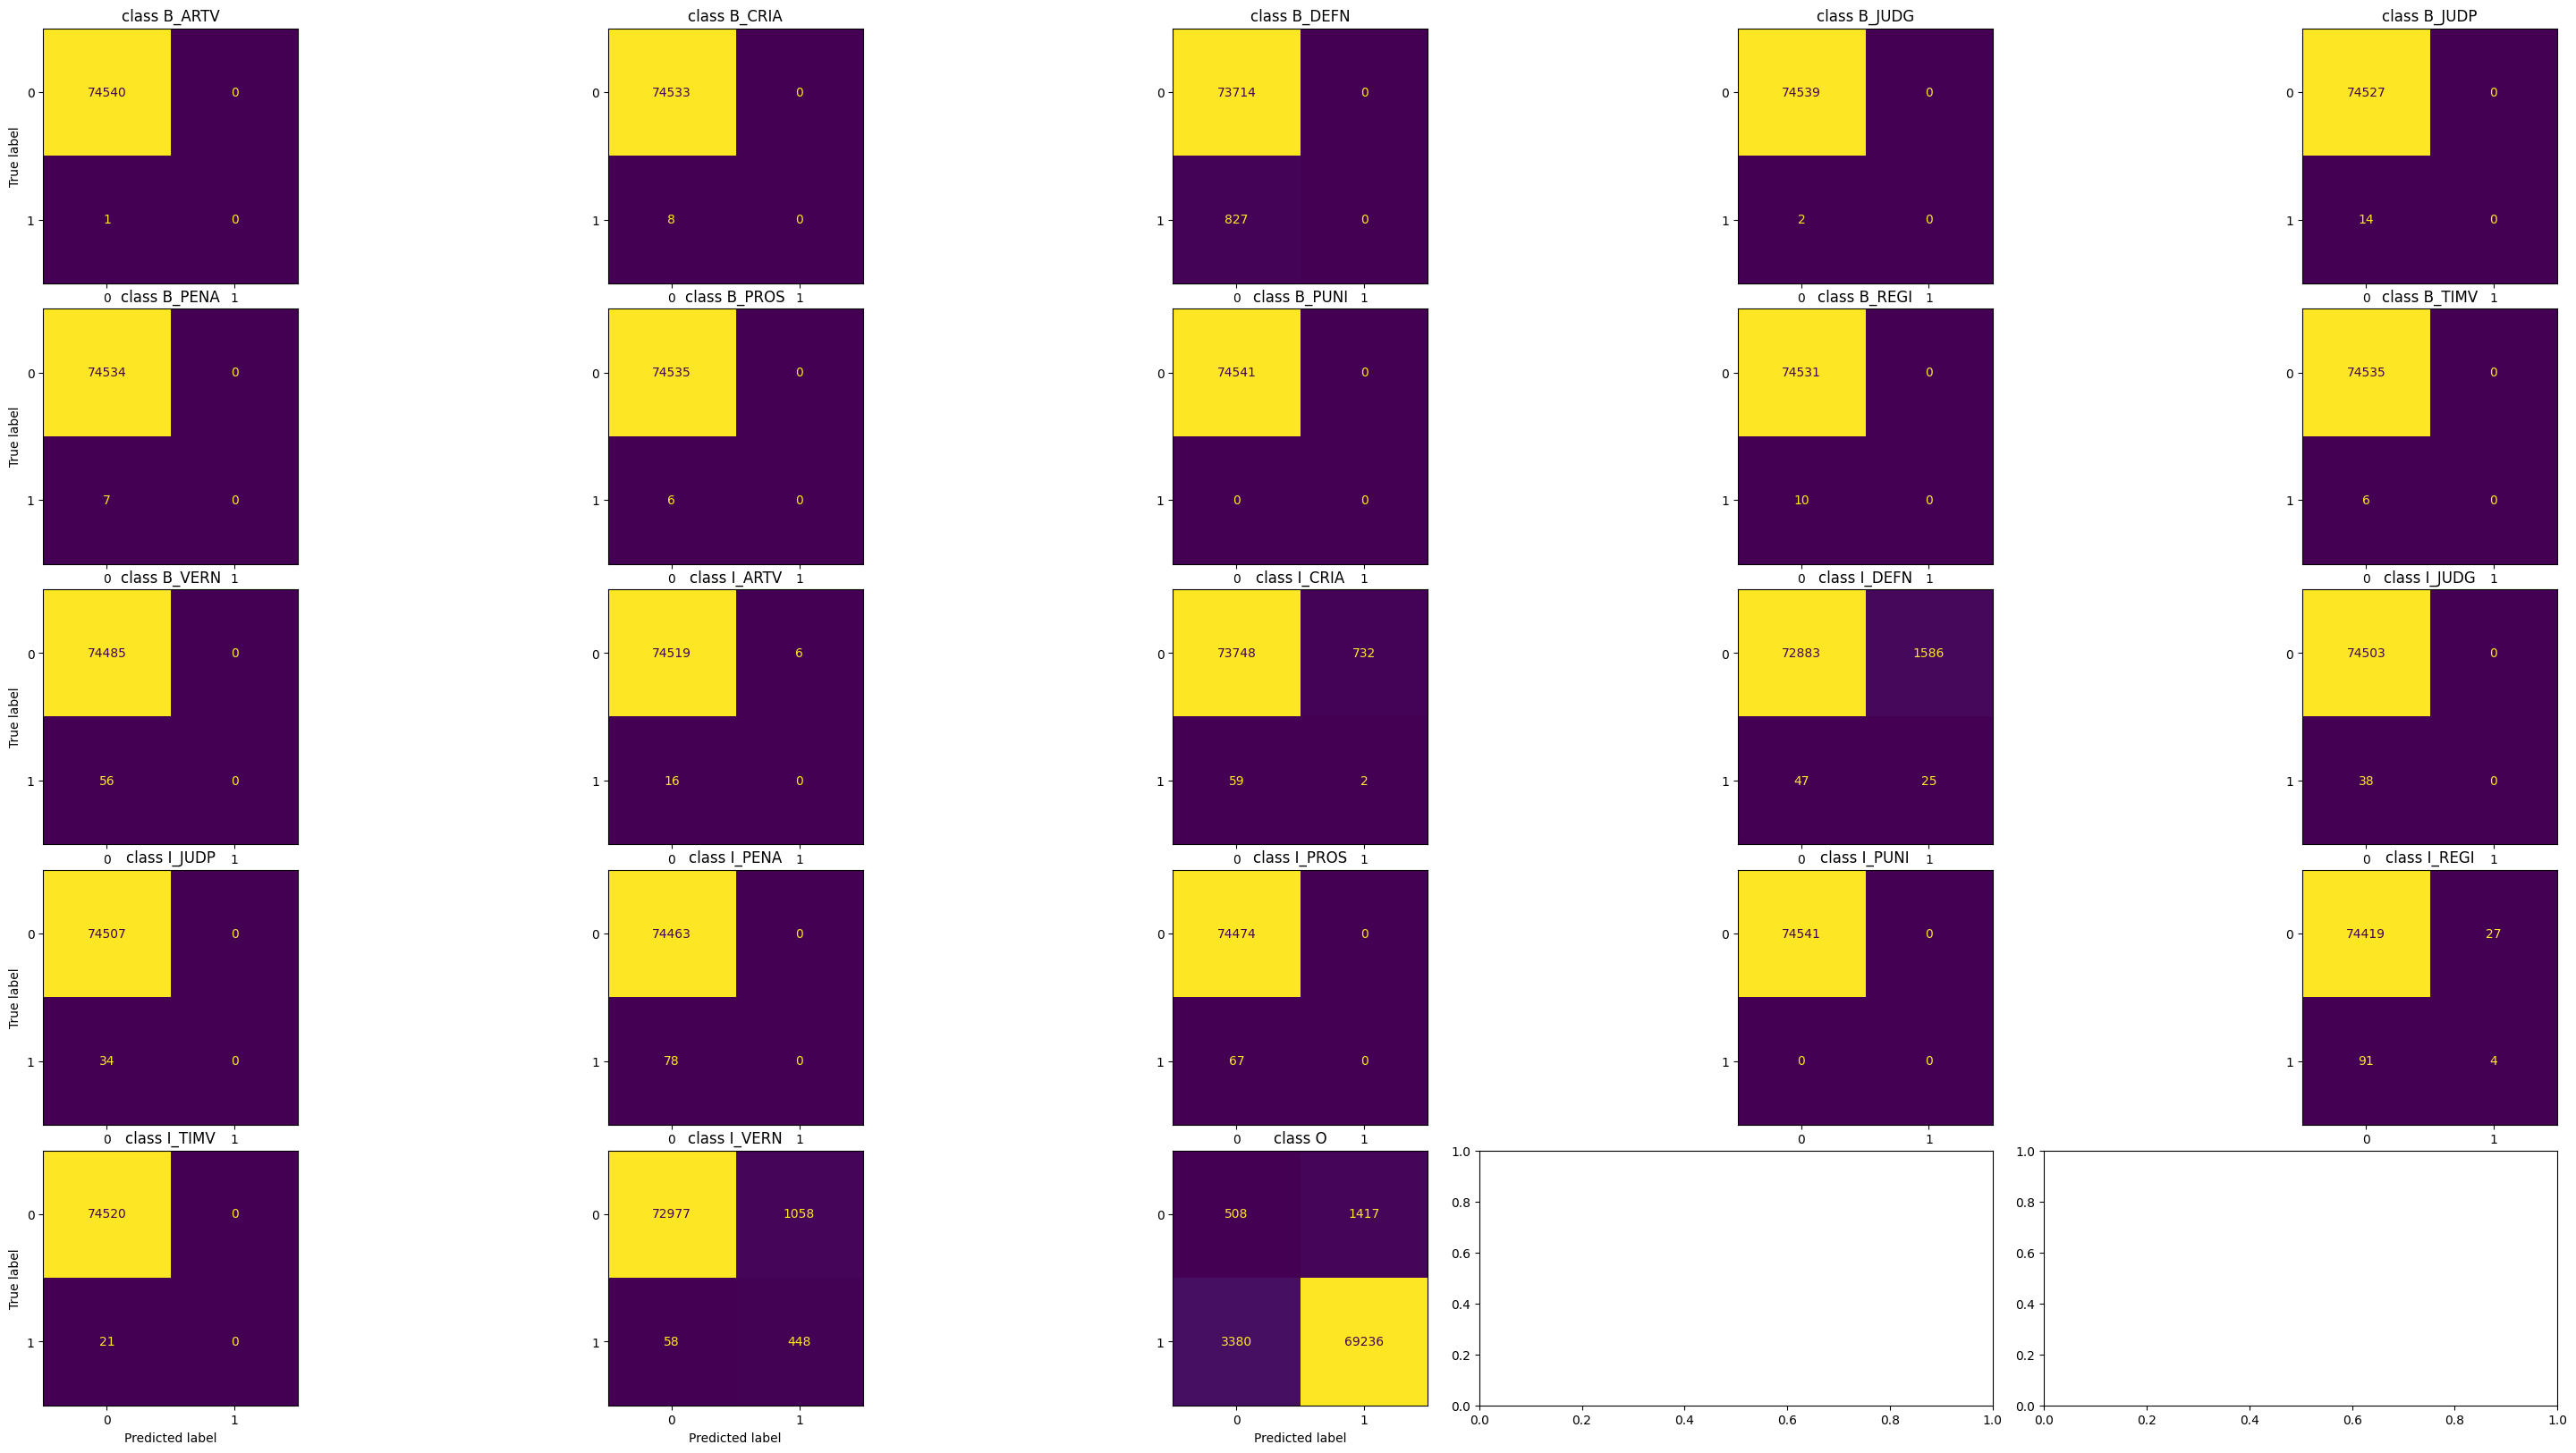

In [79]:
plot_cm(y_test, y_pred_nb, classes)

### Train model Linear classifiers

In [80]:
sgd = SGDClassifier(max_iter=50, tol=1e-3)
sgd_start = time.time()
sgd.fit(X_train, y_train)
sgd_end = time.time()

In [81]:
y_pred = sgd.predict(X_test)

#### time model

In [82]:
print(f'{(sgd_end - sgd_start):.2f} Detik.')

4.68 Detik.


#### evaluasi

In [83]:
print(classification_report(y_pred=sgd.predict(X_test), y_true=y_test, labels = classes))

              precision    recall  f1-score   support

      B_ARTV       0.00      0.00      0.00         1
      B_CRIA       0.00      0.00      0.00         8
      B_DEFN       0.00      0.00      0.00       827
      B_JUDG       0.00      0.00      0.00         2
      B_JUDP       0.00      0.00      0.00        14
      B_PENA       0.00      0.00      0.00         7
      B_PROS       0.00      0.00      0.00         6
      B_PUNI       0.00      0.00      0.00         0
      B_REGI       0.00      0.00      0.00        10
      B_TIMV       0.00      0.00      0.00         6
      B_VERN       0.66      0.93      0.77        56
      I_ARTV       0.00      0.00      0.00        16
      I_CRIA       0.00      0.00      0.00        61
      I_DEFN       0.00      0.00      0.00        72
      I_JUDG       0.00      0.00      0.00        38
      I_JUDP       0.00      0.00      0.00        34
      I_PENA       0.00      0.00      0.00        78
      I_PROS       0.00    

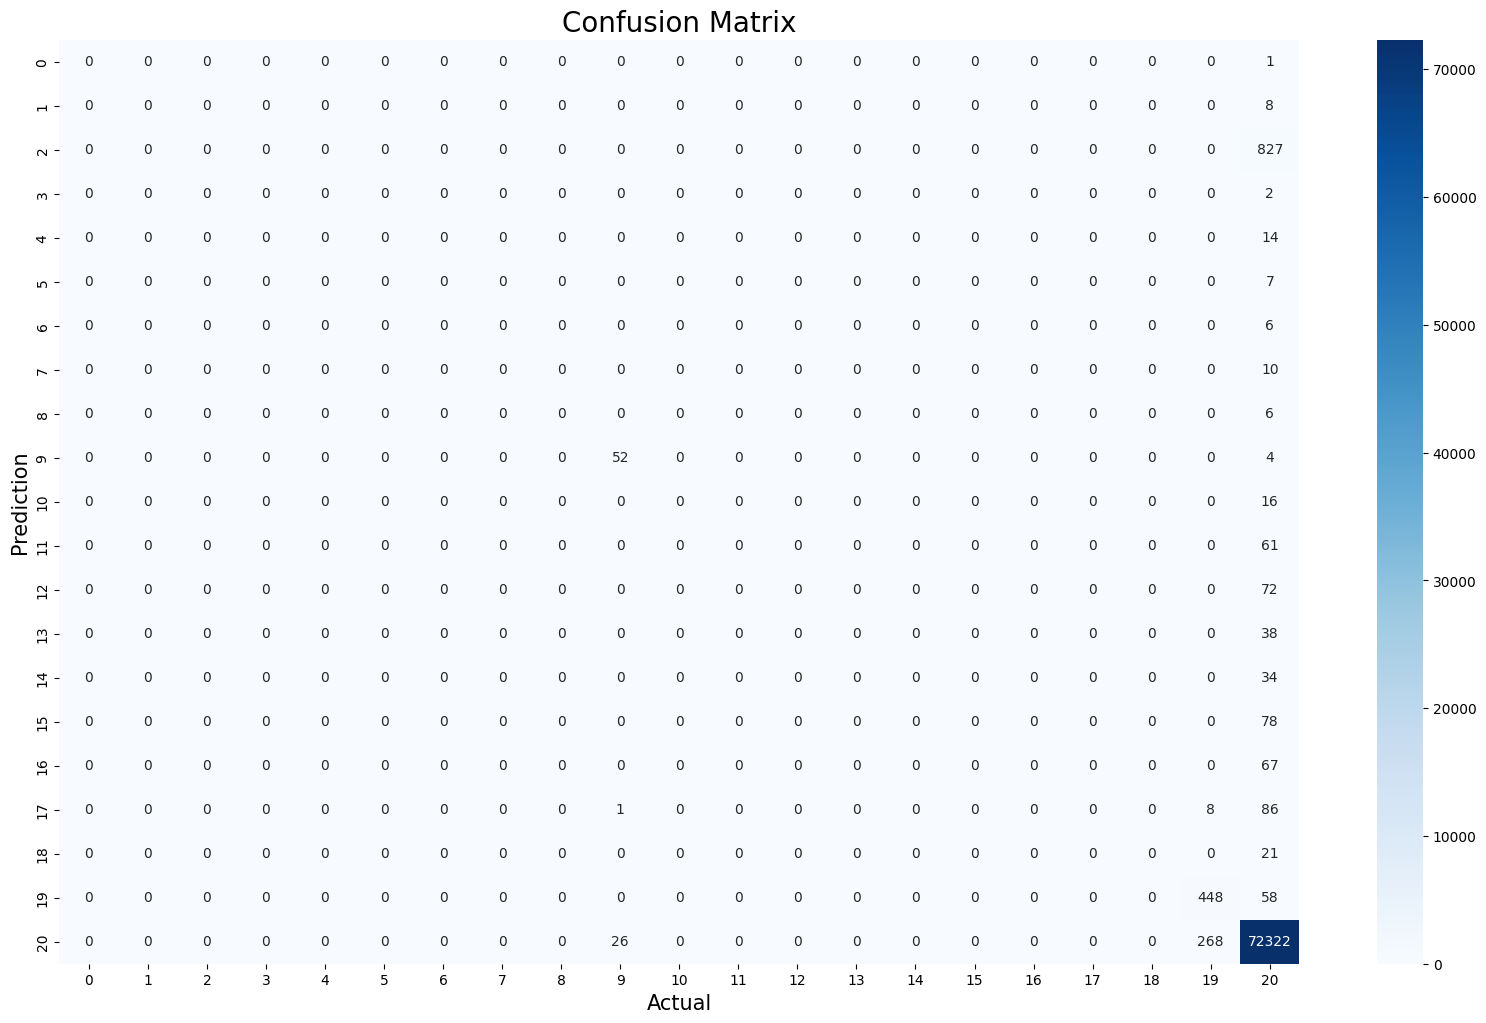

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.ylabel('Prediction', fontsize=15)
plt.xlabel('Actual', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

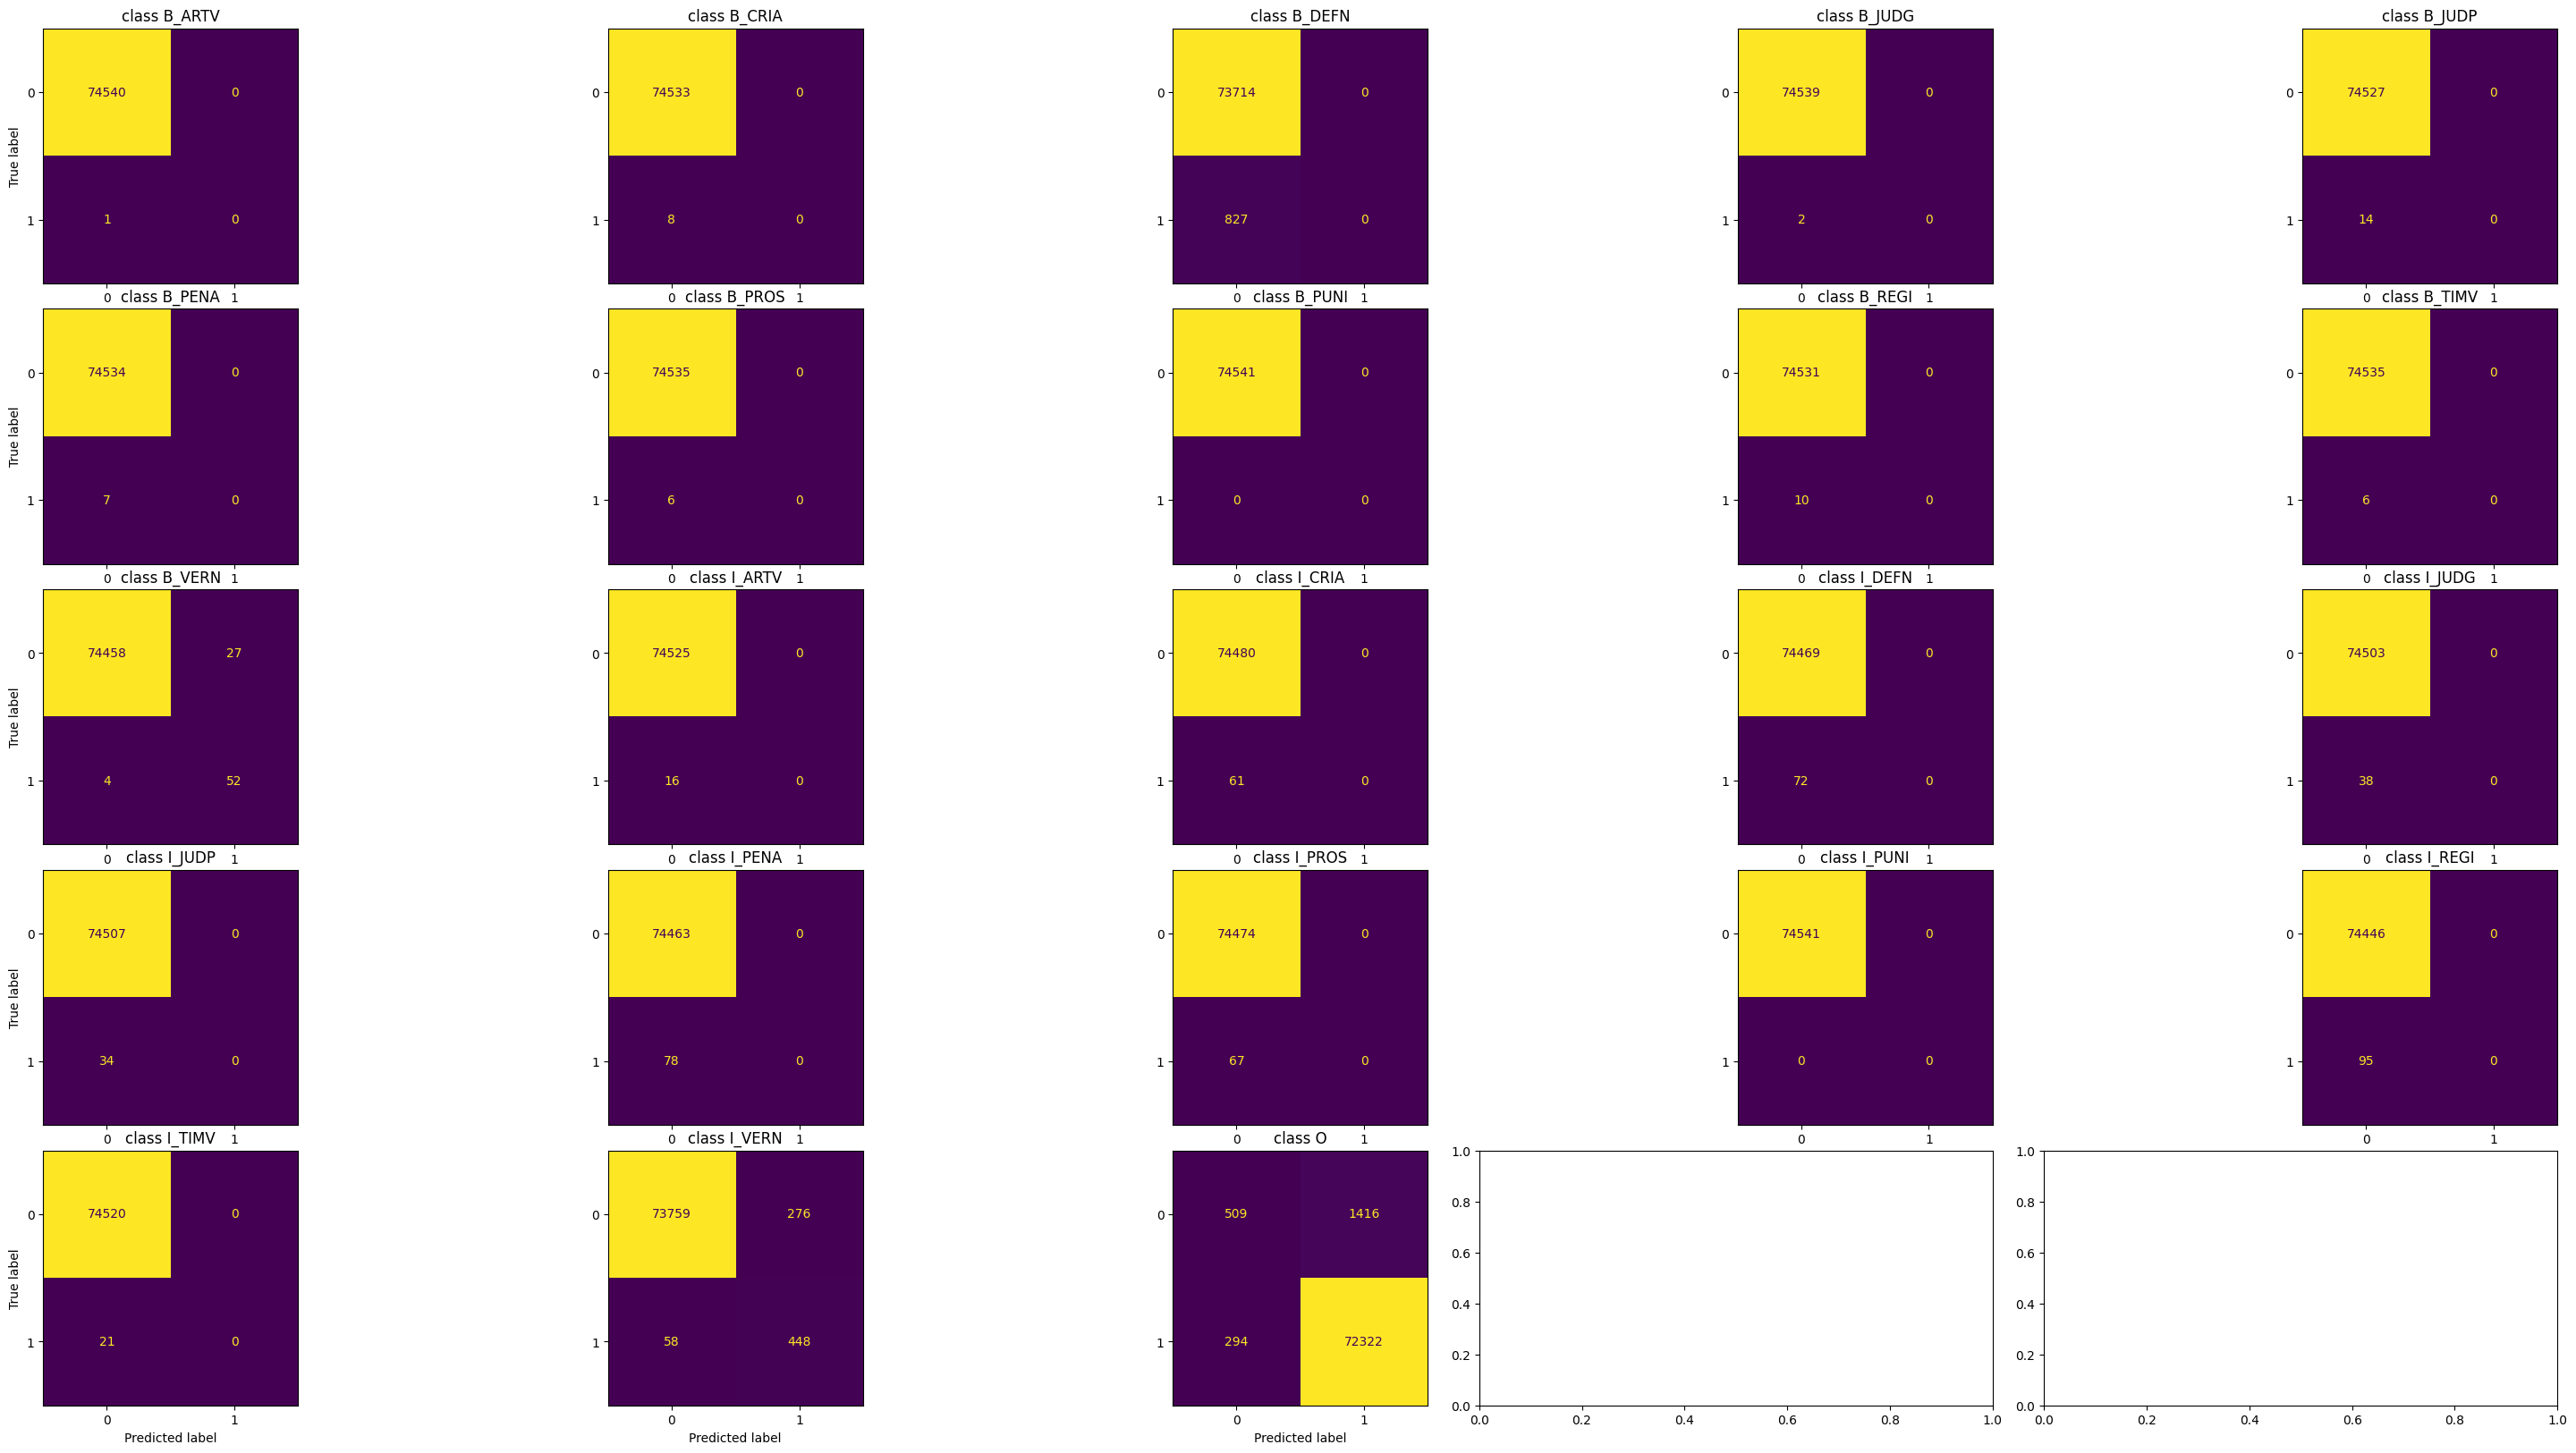

In [85]:
plot_cm(y_test, y_pred, classes)

### Train model PassiveAggresiveClassifier

In [86]:
pac = PassiveAggressiveClassifier()
pac_start = time.time()
pac.partial_fit(X_train, y_train, classes)
pac_end = time.time()

#### time model

In [87]:
print(f'{(pac_end - pac_start):.2f} Detik.')

2.22 Detik.


In [88]:
y_pred_pac = pac.predict(X_test)

#### evaluasi

In [89]:
print(classification_report(y_pred=y_pred_pac, y_true=y_test, labels = classes))

              precision    recall  f1-score   support

      B_ARTV       0.00      0.00      0.00         1
      B_CRIA       0.00      0.00      0.00         8
      B_DEFN       0.00      0.00      0.00       827
      B_JUDG       0.00      0.00      0.00         2
      B_JUDP       0.60      0.43      0.50        14
      B_PENA       0.00      0.00      0.00         7
      B_PROS       0.00      0.00      0.00         6
      B_PUNI       0.00      0.00      0.00         0
      B_REGI       0.00      0.00      0.00        10
      B_TIMV       0.00      0.00      0.00         6
      B_VERN       0.70      0.93      0.80        56
      I_ARTV       0.00      0.00      0.00        16
      I_CRIA       0.00      0.00      0.00        61
      I_DEFN       0.50      0.07      0.12        72
      I_JUDG       0.00      0.00      0.00        38
      I_JUDP       1.00      0.18      0.30        34
      I_PENA       0.00      0.00      0.00        78
      I_PROS       0.00    

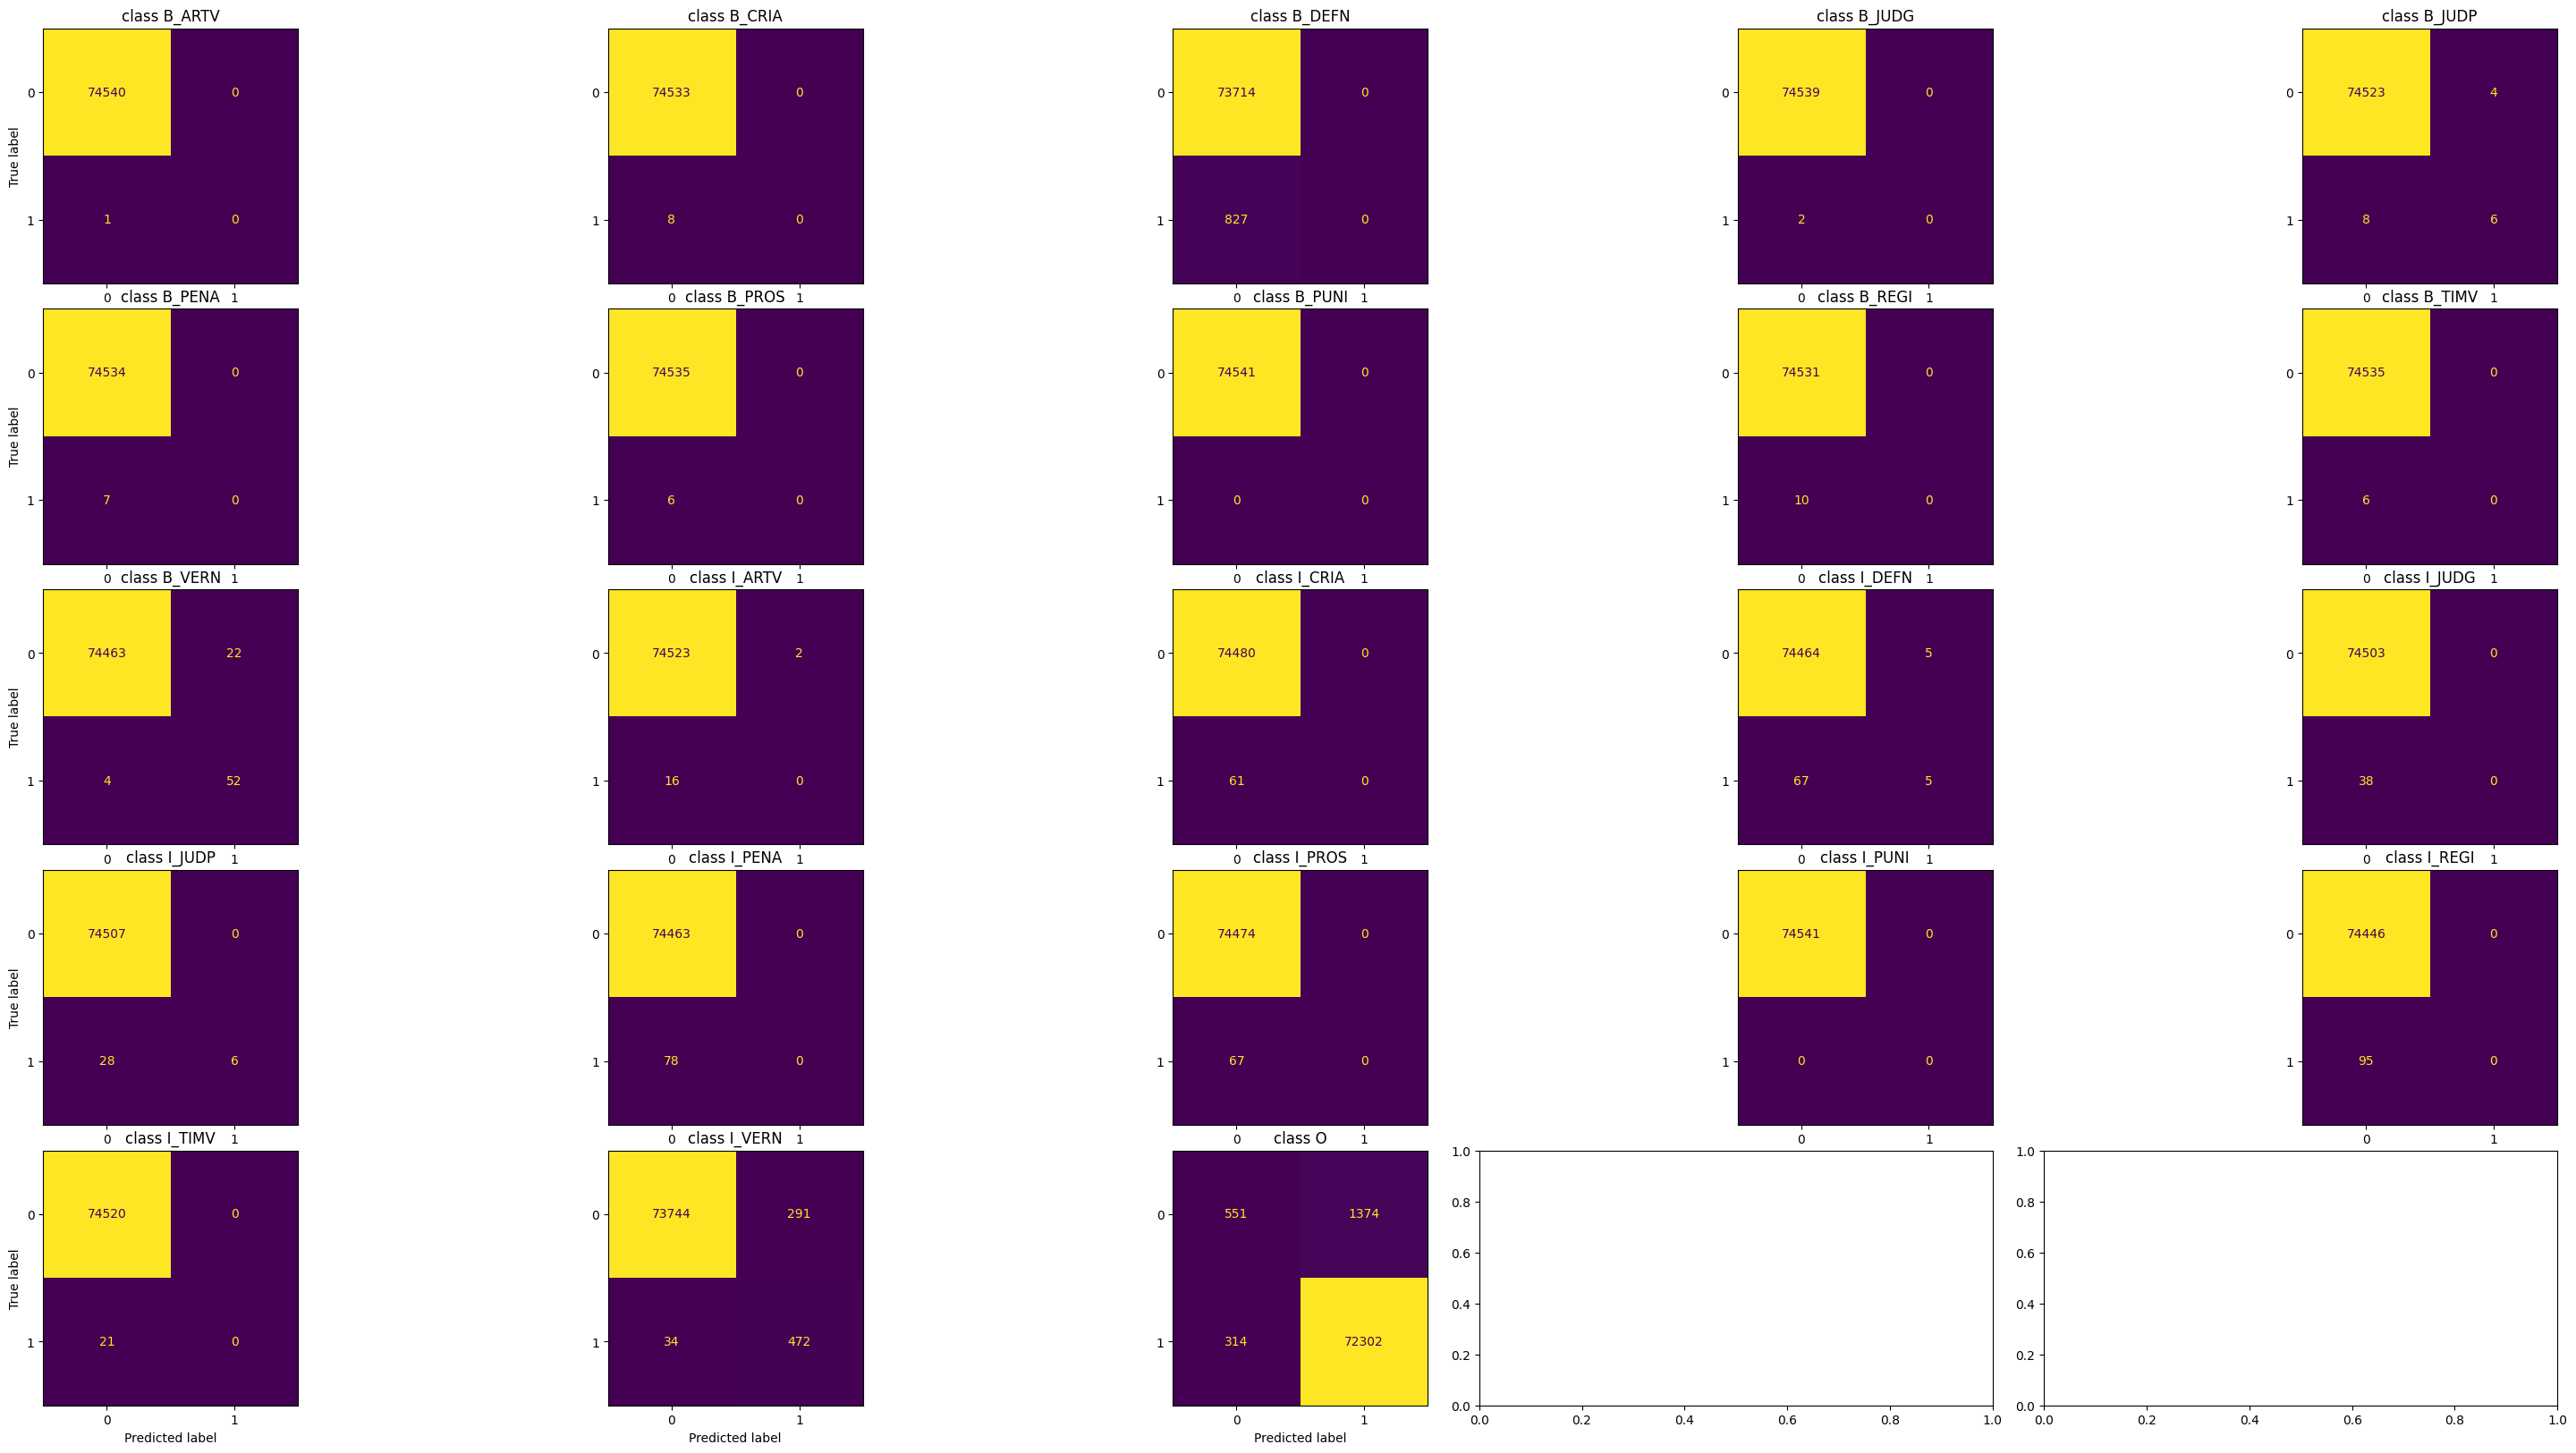

In [90]:
plot_cm(y_test, y_pred_pac, classes)

### Train model perceptron

In [91]:
percept = Perceptron()
percept_start = time.time()
percept.partial_fit(X_train, y_train, classes)
percept_end = time.time()

#### time model

In [92]:
print(f'{(percept_end - percept_start):.2f} Detik.')

1.23 Detik.


In [93]:
y_pred_percept = percept.predict(X_test)

#### evaluasi

In [94]:
print(classification_report(y_pred=y_pred_percept, y_true=y_test, labels = classes))

              precision    recall  f1-score   support

      B_ARTV       0.00      0.00      0.00         1
      B_CRIA       0.43      0.38      0.40         8
      B_DEFN       0.00      0.00      0.00       827
      B_JUDG       0.00      0.00      0.00         2
      B_JUDP       0.11      0.57      0.19        14
      B_PENA       0.50      0.14      0.22         7
      B_PROS       0.00      0.00      0.00         6
      B_PUNI       0.00      0.00      0.00         0
      B_REGI       0.00      0.00      0.00        10
      B_TIMV       0.00      0.00      0.00         6
      B_VERN       0.63      0.93      0.75        56
      I_ARTV       0.00      0.00      0.00        16
      I_CRIA       0.00      0.00      0.00        61
      I_DEFN       0.00      0.00      0.00        72
      I_JUDG       0.00      0.00      0.00        38
      I_JUDP       0.76      0.47      0.58        34
      I_PENA       0.00      0.00      0.00        78
      I_PROS       1.00    

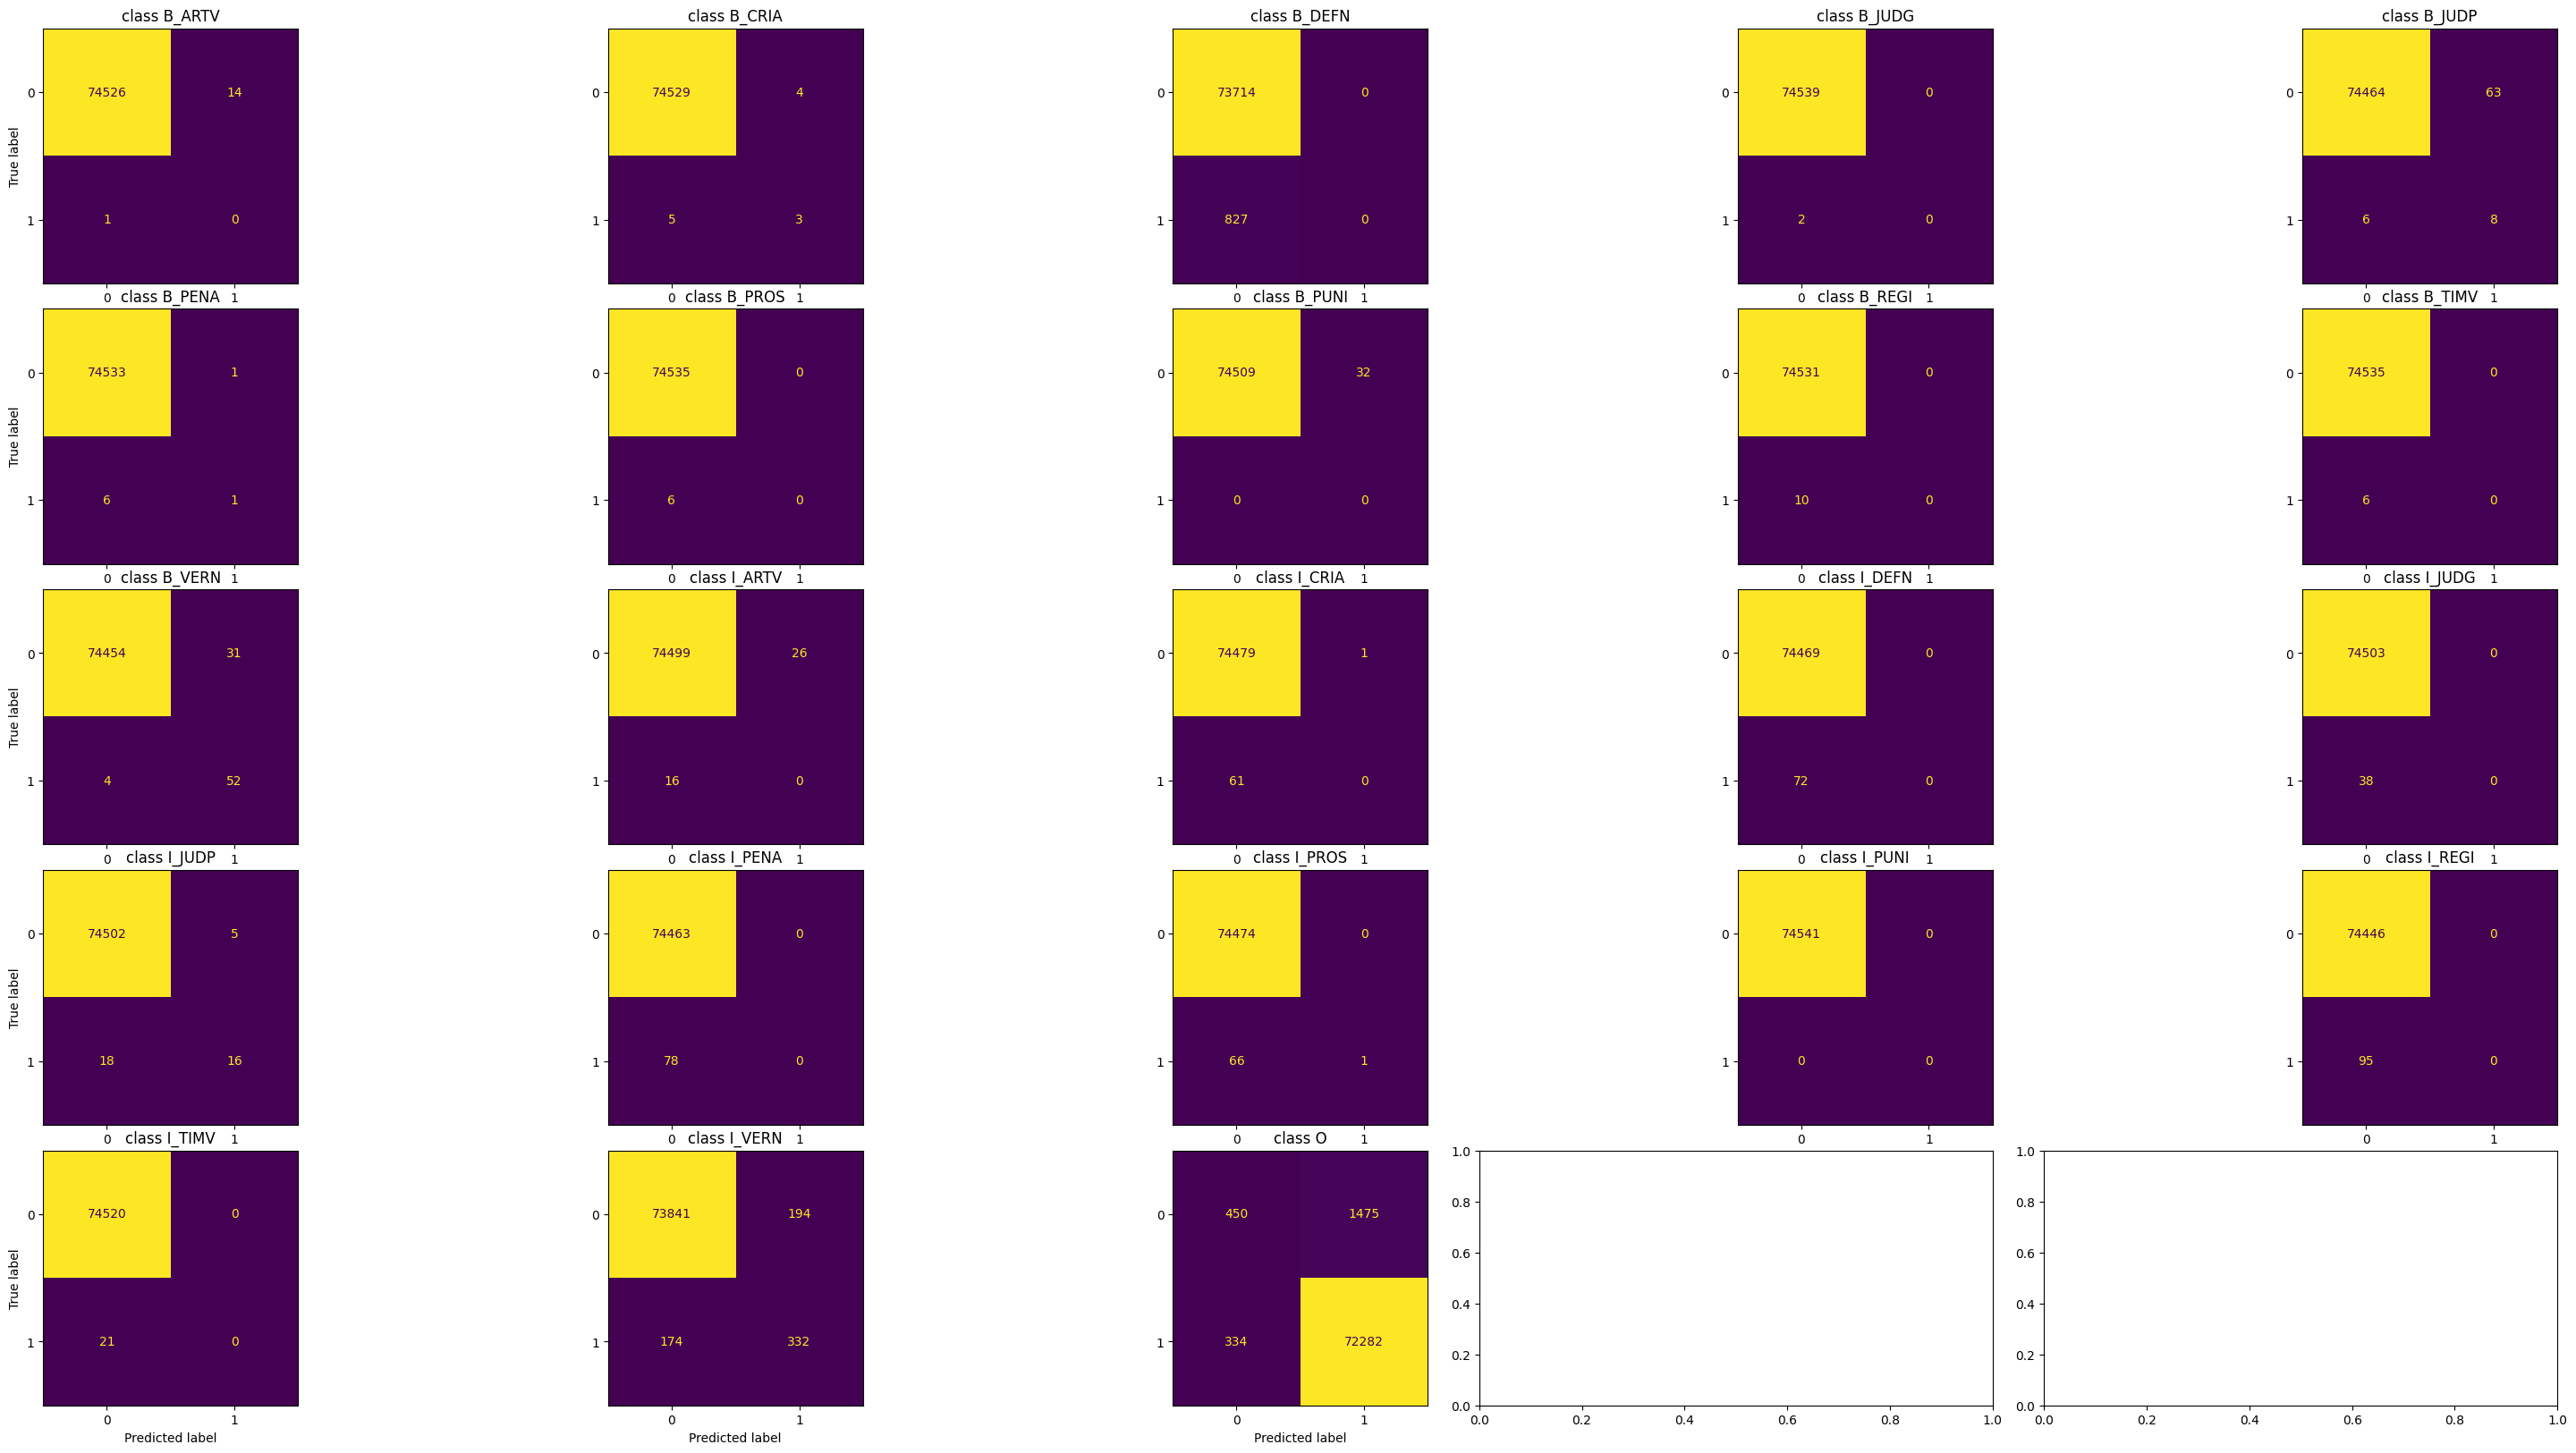

In [95]:
plot_cm(y_test, y_pred_percept, classes)

### Train model SVM

In [96]:
svm = SVC(kernel='linear', max_iter=100)
svm_start = time.time()
svm.fit(X_train, y_train)
svm_end = time.time()

#### time model

In [97]:
print(f'{(svm_end - svm_start):.2f} Detik.')

37.51 Detik.


In [98]:
y_pred_svm = svm.predict(X_test)

#### evaluasi

In [99]:
print(classification_report(y_pred=y_pred_svm, y_true=y_test, labels = classes))

              precision    recall  f1-score   support

      B_ARTV       0.00      0.00      0.00         1
      B_CRIA       0.60      0.38      0.46         8
      B_DEFN       0.08      0.00      0.00       827
      B_JUDG       0.00      0.00      0.00         2
      B_JUDP       0.67      0.57      0.62        14
      B_PENA       1.00      0.29      0.44         7
      B_PROS       0.40      0.33      0.36         6
      B_PUNI       0.00      0.00      0.00         0
      B_REGI       1.00      0.10      0.18        10
      B_TIMV       0.00      0.00      0.00         6
      B_VERN       0.66      0.93      0.77        56
      I_ARTV       0.00      0.00      0.00        16
      I_CRIA       0.00      0.00      0.00        61
      I_DEFN       0.04      0.18      0.06        72
      I_JUDG       0.53      0.26      0.35        38
      I_JUDP       0.70      0.41      0.52        34
      I_PENA       0.00      0.00      0.00        78
      I_PROS       1.00    

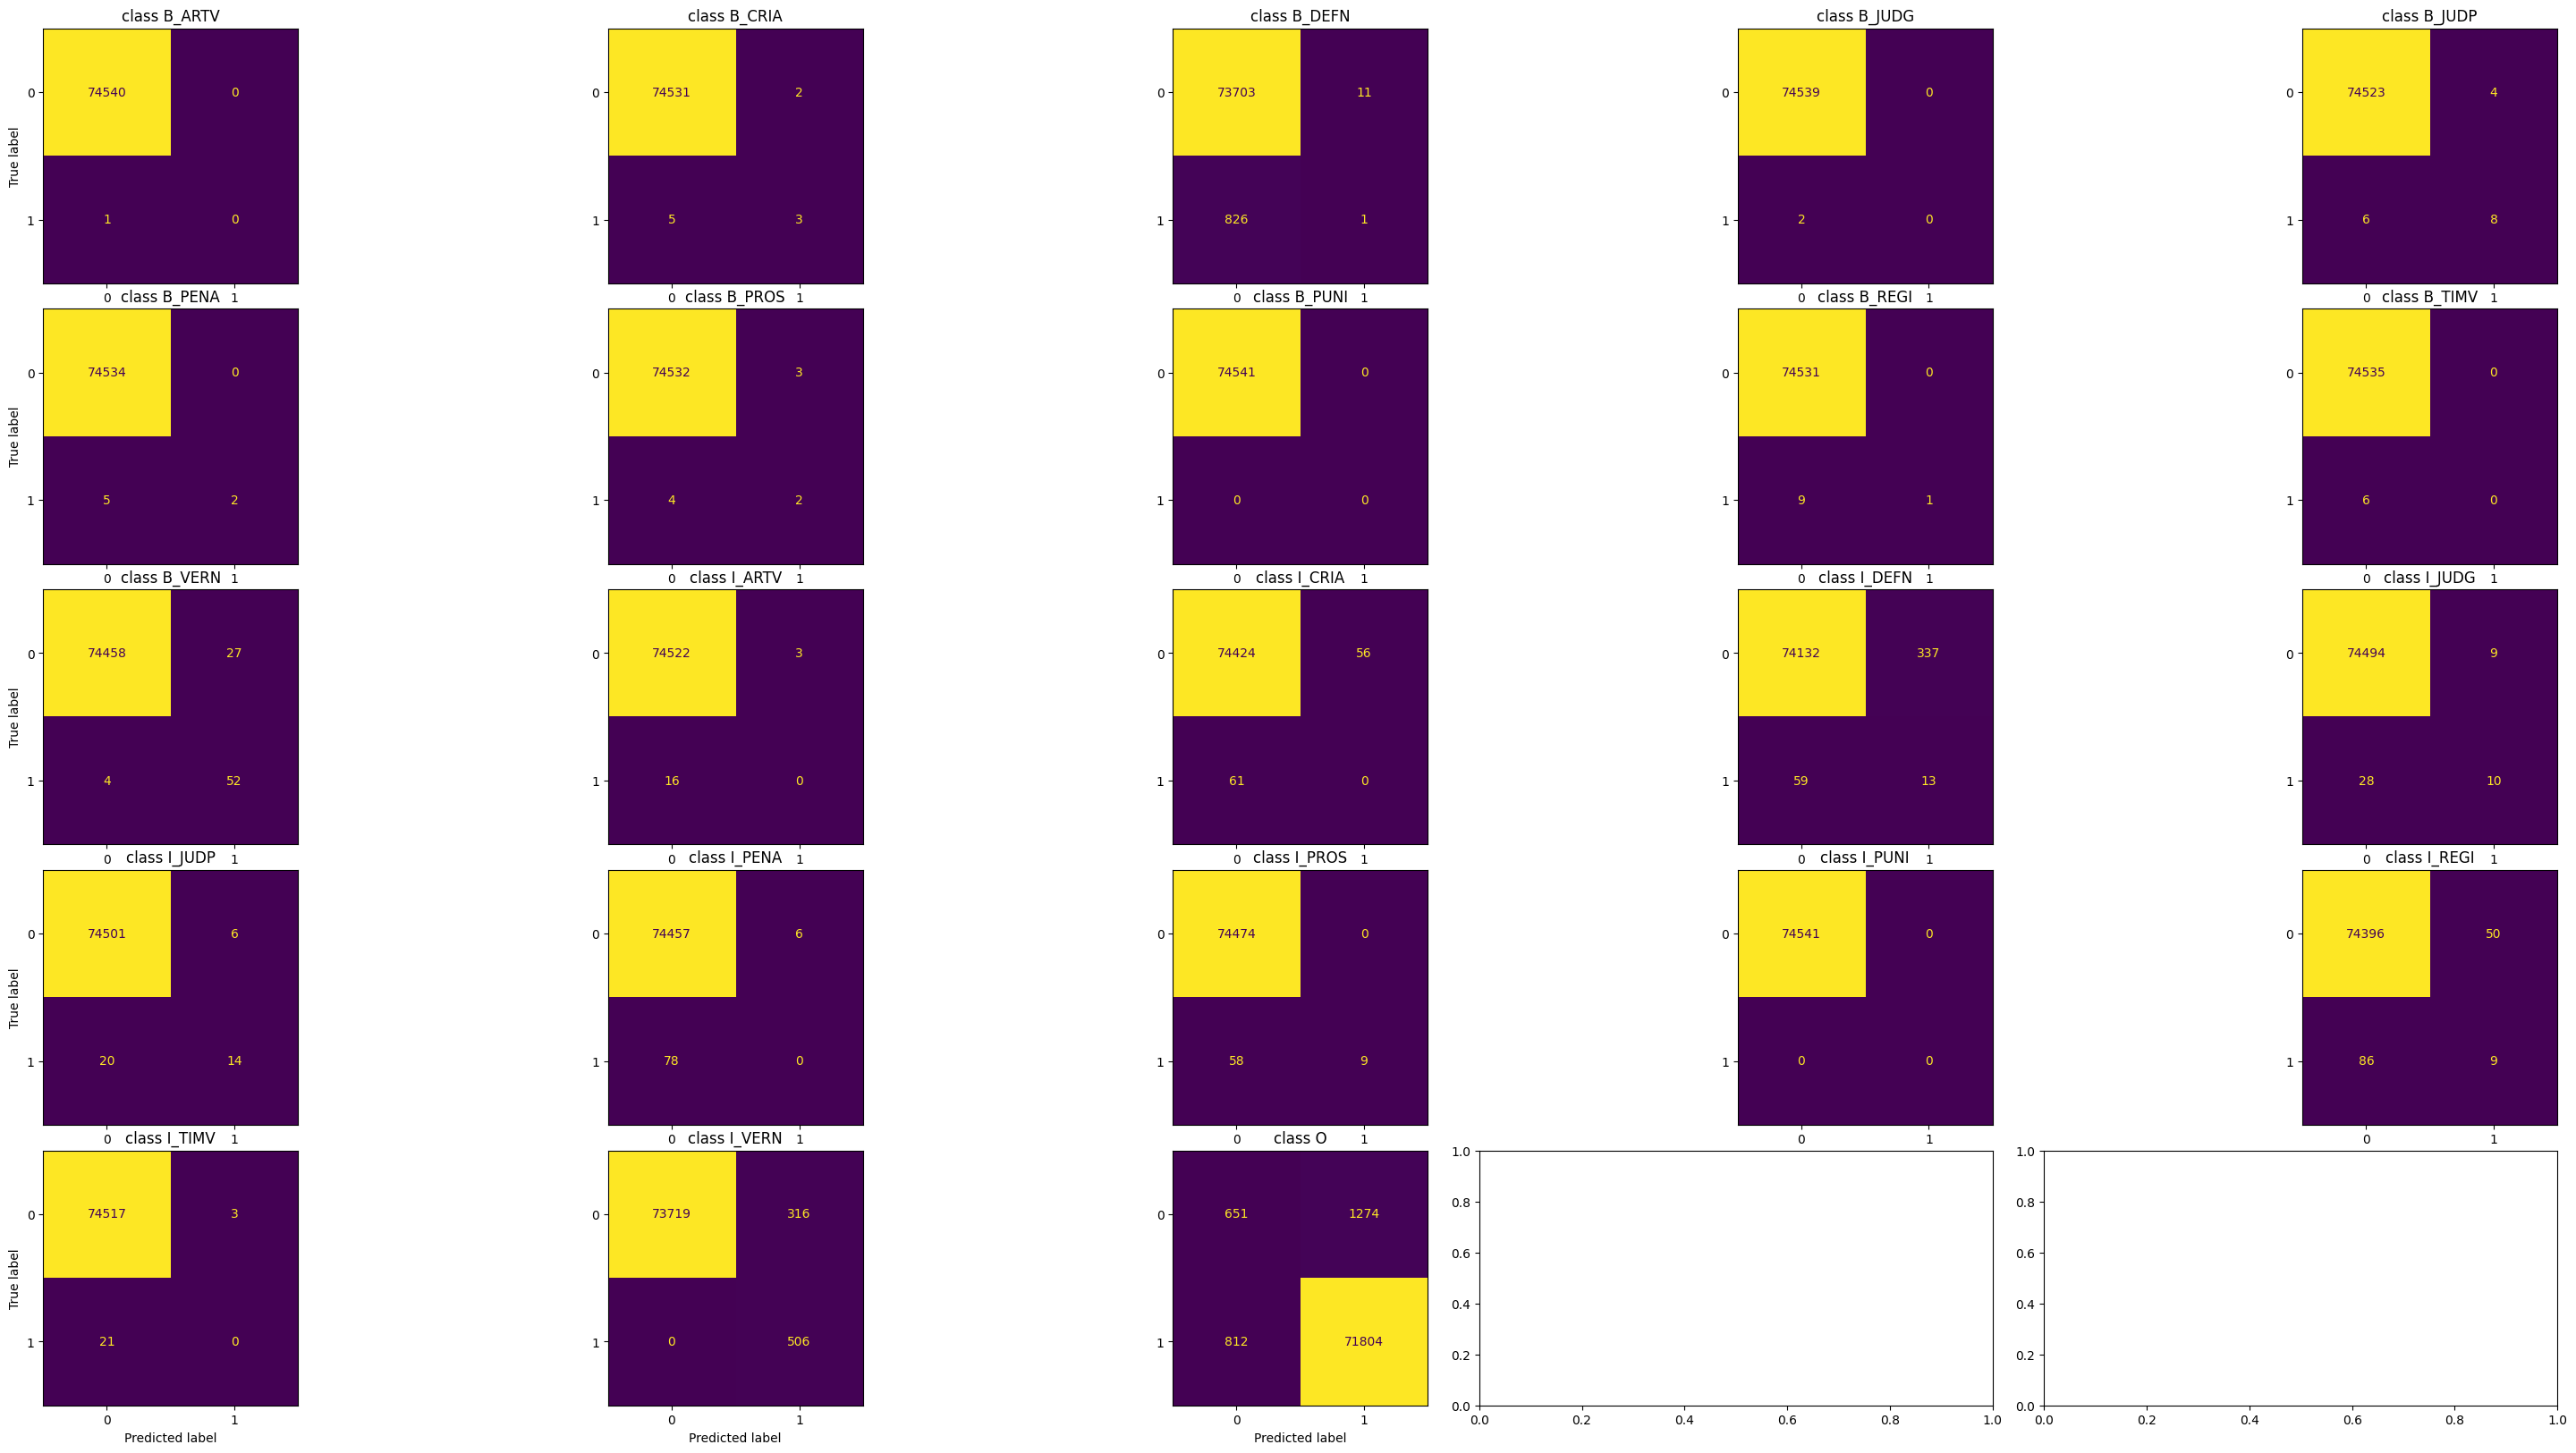

In [100]:
plot_cm(y_test, y_pred_svm, classes)

### Train model CRF

In [106]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, v, n,t) for w, p, v, n,t in zip(s['token'].values.tolist(),
                                                                     s['pos'].values.tolist(),
                                                                     s['prev'].values.tolist(),
                                                                     s['next'].values.tolist(),
                                                                     s['tag'].values.tolist())]
        self.grouped = self.data.groupby('fragment').apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [107]:
X_crf = df.drop(['doc'], axis=1)
getter = SentenceGetter(X_crf)
sentences = getter.sentences

In [108]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    prev = sent[i][2]
    nextt = sent[i][3]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'prev.lower()': prev.lower(),
        'prev[-3:]': prev[-3:],
        'prev[-2:]': prev[-2:],
        'prev.isupper()': prev.isupper(),
        'prev.istitle()': prev.istitle(),
        'prev.isdigit()': prev.isdigit(),
        'nextt.lower()': nextt.lower(),
        'nextt[-3:]': nextt[-3:],
        'nextt[-2:]': nextt[-2:],
        'nextt.isupper()': nextt.isupper(),
        'nextt.istitle()': nextt.istitle(),
        'nextt.isdigit()': nextt.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        prev1 = sent[i-1][2]
        nextt1 = sent[i-1][3]

        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:prev.lower()': prev1.lower(),
            '-1:prev.istitle()': prev1.istitle(),
            '-1:prev.isupper()': prev1.isupper(),
            '-1:nextt.lower()': nextt1.lower(),
            '-1:nextt.istitle()': nextt1.istitle(),
            '-1:nextt.isupper()': nextt1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        prev1 = sent[i+1][2]
        nextt1 = sent[i+1][3]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:prev.lower()': prev1.lower(),
            '+1:prev.istitle()': prev1.istitle(),
            '+1:prev.isupper()': prev1.isupper(),
            '+1:nextt.lower()': nextt1.lower(),
            '+1:nextt.istitle()': nextt1.istitle(),
            '+1:nextt.isupper()': nextt1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
  return [word2features(sent, i) for i in range(len(sent))]
def sent2labels(sent):
  return [label for token, postag, prev, nextt, label in sent]
def sent2tokens(sent):
  return [token for token, postag, prev, nextt, label in sent]

In [109]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [110]:
new = X_crf[len_a+1:]
sentence_nuniq = new['fragment'].nunique()
sentence_nuniq

1399

In [111]:
X_train = X[:sentence_nuniq]
y_train = y[:sentence_nuniq]
X_test = X[sentence_nuniq:]
y_test = y[sentence_nuniq:]

In [112]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers

In [113]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf_start = time.time()
crf.fit(X_train, y_train)
crf_end = time.time()

#### time model

In [114]:
print(f'{(crf_end - crf_start):.2f} Detik.')

99.76 Detik.


In [115]:
y_pred_crf= crf.predict(X_test)

#### evaluasi

In [116]:
report = flat_classification_report(y_pred=y_pred_crf, y_true=y_test)
print(report)

              precision    recall  f1-score   support

      B_ARTV       1.00      0.06      0.12        16
      B_CRIA       1.00      0.33      0.50        18
      B_DEFN       0.70      0.02      0.03       867
      B_JUDG       0.75      0.75      0.75         4
      B_JUDP       0.68      0.63      0.65        27
      B_PENA       0.89      0.57      0.70        14
      B_PROS       1.00      0.91      0.95        11
      B_PUNI       0.00      0.00      0.00         1
      B_REGI       1.00      0.30      0.46        20
      B_TIMV       0.00      0.00      0.00         9
      B_VERN       0.67      0.97      0.79        69
      I_ARTV       1.00      0.03      0.05        74
      I_CRIA       1.00      0.80      0.89       108
      I_DEFN       0.64      0.22      0.33       301
      I_JUDG       0.89      0.75      0.81        76
      I_JUDP       0.78      0.48      0.60        58
      I_PENA       0.92      0.39      0.55       114
      I_PROS       1.00    

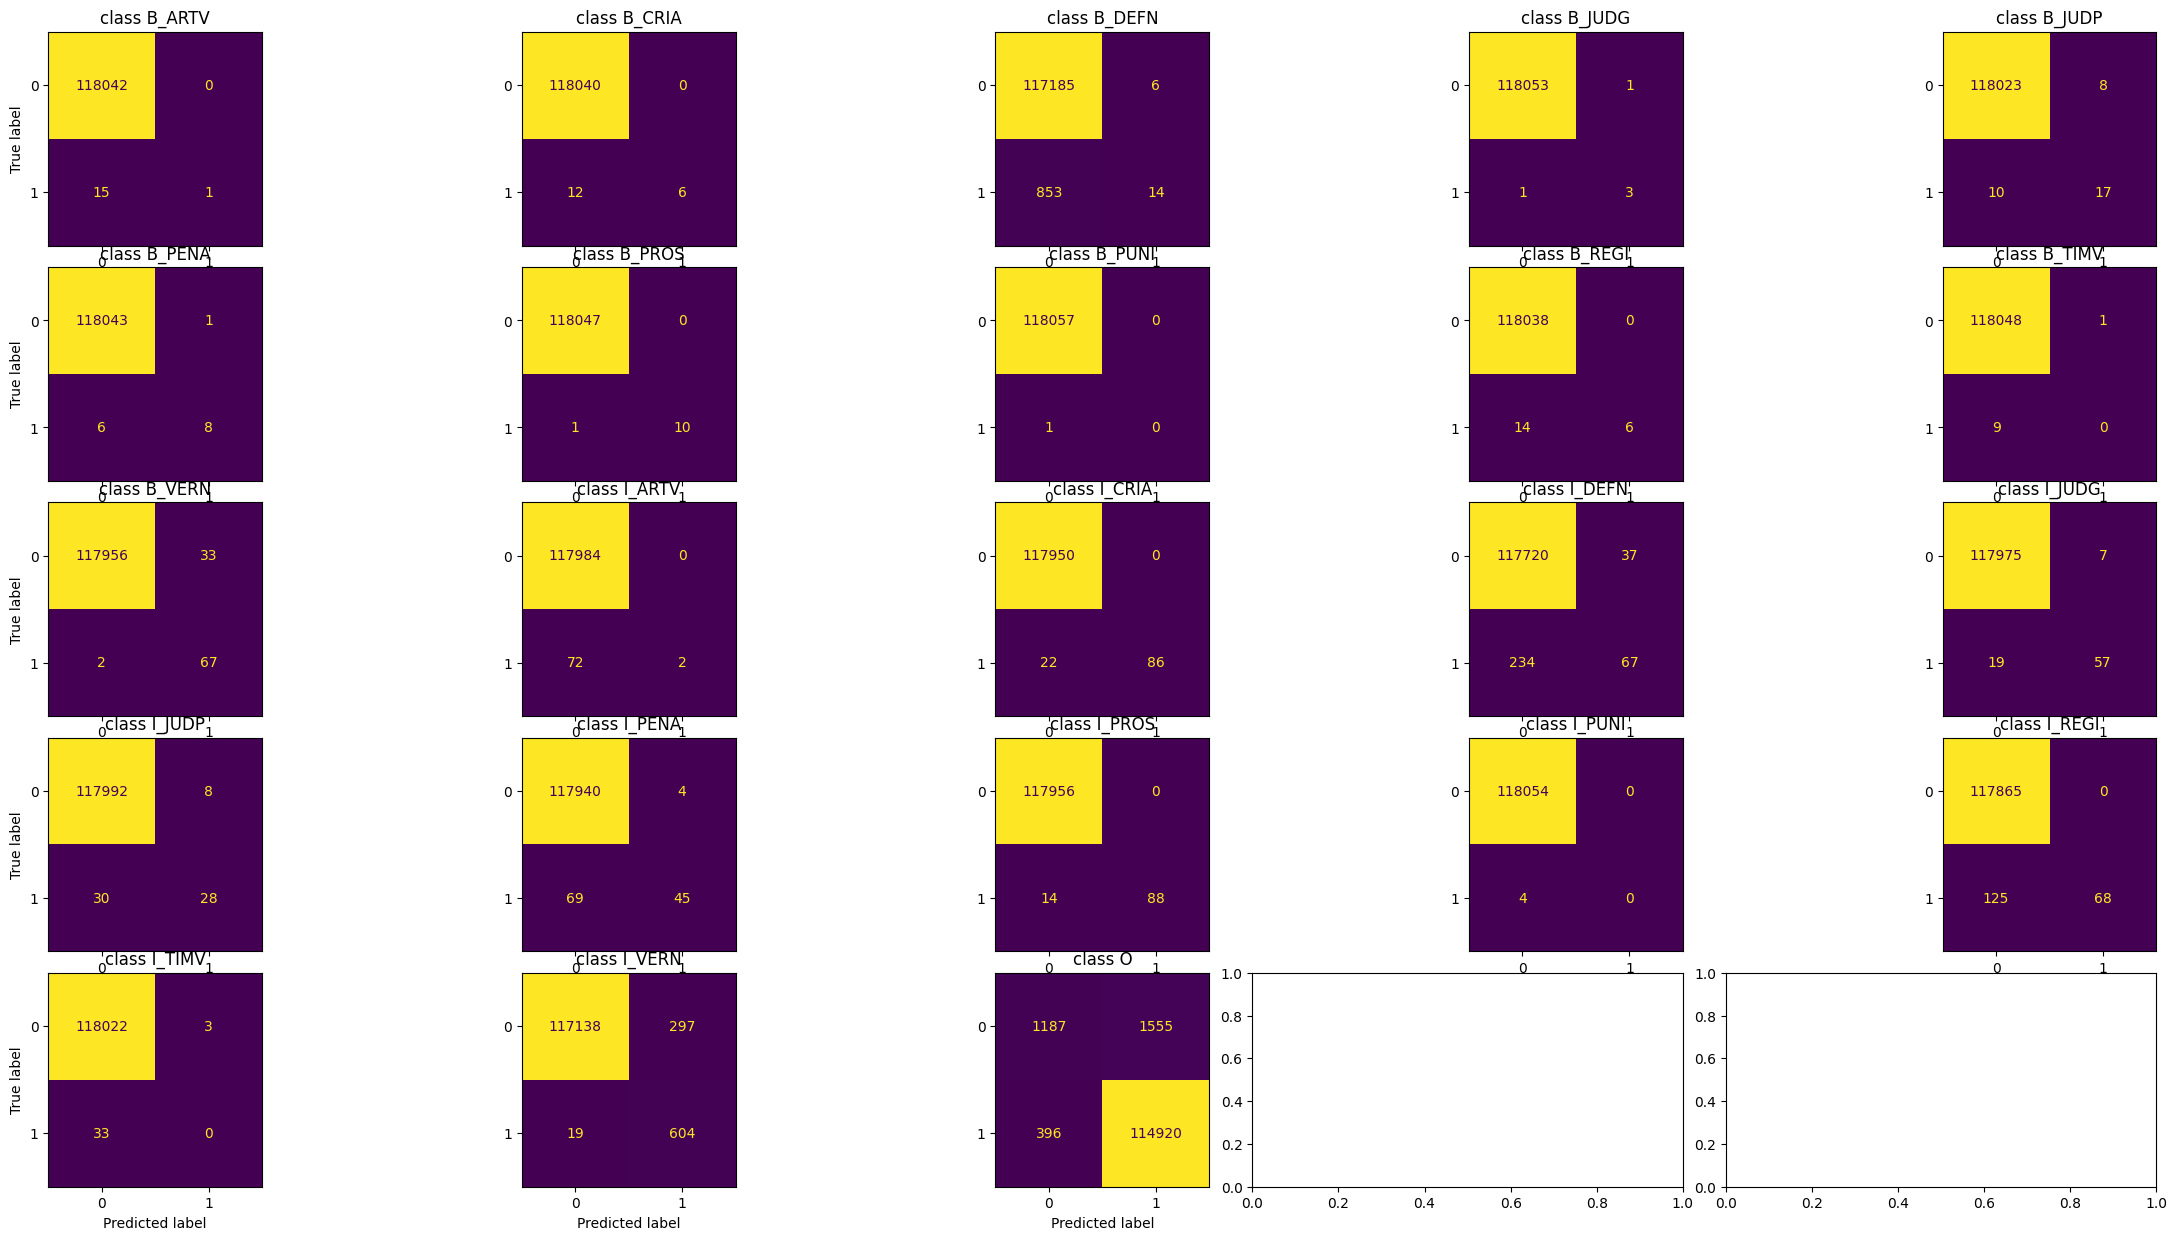

In [117]:
plot_cm_crf(y_test, y_pred_crf, classes=classes)